# Project 2 COFFEE CHAIN 

---
### Project Introduction
For this project, I am using the data from Tableau Community. The data presented here was collected over a two years period of 2010 and 2011 in United States as part of a study on the coffee chain business of United States. This dataset has three sheets with three dimensions: time, product, and location. I merged three sheets into one and do the further analysis.

Profit maximization is the goal for all the business. 

Question: 
1.What are the most poplar product in coffee chain?

2.What kinds of products are underperformed? 

3.Is there any gain loss in the States? If so,which state? And what kind of product?

4.How do we solve the problems above, and how to make this coffee company more profitable?

5.Can we use budget data to predict Profit of coffee chain?

---

---
### Part1 :EDA
---

---

### Basic package imports
---

In [744]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

### The coffee chain excel files contain three sheets
### Sheet1:fact table data; 
### Sheet2:location
### Sheet3:Product description.

## 1. Load the data from file

---
###Load the dataset "Sample_CoffeeChain.xls" 

In [780]:
### First of all,load 3 sheets
xls = pd.ExcelFile('/Users/ChrisH/Desktop/ECON628-01-chrishy2ma/projects/project_2/Sample_CoffeeChain.xls')
Fact= xls.parse('FactTable')
Location= xls.parse('Location')
Product= xls.parse('Product')

## 2. Do an initial overview of the data

---

In [781]:
###read sheet 1 
Fact

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00
5,53,108,180,72,55,23,558,80,80,130,210,720,6,01/01/2010 00:00:00
6,99,171,341,170,72,47,1091,110,140,160,300,970,8,01/01/2010 00:00:00
7,0,87,150,63,87,57,435,20,50,80,130,719,9,01/01/2010 00:00:00
8,33,80,140,60,47,19,336,40,50,70,120,970,10,01/01/2010 00:00:00
9,17,72,130,58,55,22,338,20,40,70,110,719,11,01/01/2010 00:00:00


In [782]:
Fact.shape

(4248, 14)

In [783]:
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00


In [784]:
Fact.tail(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
4243,19,32,60,24,19,7,567,20,20,30,50,206,4,01/12/2011 00:00:00
4244,34,80,155,65,57,24,403,30,60,80,140,509,5,01/12/2011 00:00:00
4245,76,96,188,80,45,24,1079,60,70,100,170,360,6,01/12/2011 00:00:00
4246,86,104,188,72,46,23,461,80,80,120,200,360,2,01/12/2011 00:00:00
4247,30,145,266,105,125,95,716,50,120,170,290,206,3,01/12/2011 00:00:00


In [785]:
### Convert the Date column to 'datatime' datatype.
## STEP2: sort the datetime
Fact['Date']=pd.to_datetime(Fact['Date'])
Fact=Fact.sort('Date')
Fact

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
113,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
114,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
115,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
116,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01
117,42,83,140,57,41,18,364,50,50,80,130,254,9,2010-01-01
118,53,108,180,72,55,23,558,50,60,90,150,830,4,2010-01-01
119,159,245,452,207,86,64,965,220,260,300,560,409,2,2010-01-01
120,68,107,190,83,39,27,623,100,100,130,230,325,3,2010-01-01
112,29,56,100,44,27,14,623,50,50,70,120,580,2,2010-01-01


In [789]:
### Reset the index
Fact=Fact.reset_index(drop=True)
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
1,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
2,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
3,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
4,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01


In [790]:
Fact.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


In [788]:
### THE PROFIT MIN is -638,which means there are gain loss from products,let's find out them later.

In [754]:
Fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 14 columns):
Profit            4248 non-null int64
Margin            4248 non-null int64
Sales             4248 non-null int64
COGS              4248 non-null int64
Total Expenses    4248 non-null int64
Marketing         4248 non-null int64
Inventory         4248 non-null int64
Budget Profit     4248 non-null int64
Budget COGS       4248 non-null int64
Budget Margin     4248 non-null int64
Budget Sales      4248 non-null int64
Area Code         4248 non-null int64
ProductId         4248 non-null int64
Date              4248 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(13)
memory usage: 464.7 KB


In [755]:
Fact.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
dtype: int64

In [756]:
### No missing value.

In [757]:
###read sheet 2

In [758]:
Location

,Area Code,State,Market,Market Size
0,203,Connecticut,East,Small Market
1,206,Washington,West,Small Market
2,209,California,West,Major Market
3,210,Texas,South,Major Market
4,212,New York,East,Major Market
5,213,California,West,Major Market
6,214,Texas,South,Major Market
7,216,Ohio,Central,Major Market
8,217,Illinois,Central,Major Market
9,224,Illinois,Central,Major Market


In [759]:
Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
Area Code      156 non-null int64
State          156 non-null object
Market         156 non-null object
Market Size    156 non-null object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [760]:
Location.isnull().sum()

Area Code      0
State          0
Market         0
Market Size    0
dtype: int64

In [761]:
### read sheet 3

In [762]:
Product

,Product Type,Product,ProductId,Type
0,Coffee,Amaretto,1,Regular
1,Coffee,Columbian,2,Regular
2,Coffee,Decaf Irish Cream,3,Decaf
3,Espresso,Caffe Latte,4,Regular
4,Espresso,Caffe Mocha,5,Regular
5,Espresso,Decaf Espresso,6,Decaf
6,Espresso,Regular Espresso,7,Regular
7,Herbal Tea,Chamomile,8,Decaf
8,Herbal Tea,Lemon,9,Decaf
9,Herbal Tea,Mint,10,Decaf


In [763]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Product Type    13 non-null object
Product         13 non-null object
ProductId       13 non-null int64
Type            13 non-null object
dtypes: int64(1), object(3)
memory usage: 488.0+ bytes


In [764]:
Product.isnull().sum()

Product Type    0
Product         0
ProductId       0
Type            0
dtype: int64

In [791]:
### After the first glance of three sheets,we can see this data has three dimensions: time, product, and location.
### Now merging three sheets into one and do the futher anaysis
### P.S.: learning code from http://pandas.pydata.org/pandas-docs/stable/merging.html
coffee_chain_1=pd.merge(Fact,Location, on='Area Code')
coffee_chain_1

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market
1,0,87,150,63,87,57,435,20,50,80,130,719,9,2010-01-01,Colorado,Central,Major Market
2,17,72,130,58,55,22,338,20,40,70,110,719,11,2010-01-01,Colorado,Central,Major Market
3,99,137,232,95,38,26,809,110,100,140,240,719,3,2010-01-02,Colorado,Central,Major Market
4,18,73,132,59,55,22,331,10,50,60,110,719,11,2010-01-02,Colorado,Central,Major Market
5,84,117,198,81,33,22,441,110,90,140,230,719,5,2010-01-03,Colorado,Central,Major Market
6,94,163,325,162,69,45,1059,100,130,150,280,719,8,2010-01-03,Colorado,Central,Major Market
7,34,75,138,63,41,19,965,40,50,70,120,719,12,2010-01-04,Colorado,Central,Major Market
8,48,102,170,68,54,22,559,80,70,130,200,719,6,2010-01-04,Colorado,Central,Major Market
9,-4,73,125,52,77,47,433,20,40,70,110,719,9,2010-01-04,Colorado,Central,Major Market


In [792]:
coffee_chain=pd.merge(coffee_chain_1,Product, on='ProductId')
coffee_chain

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,2010-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,2010-01-12,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,2011-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,2011-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
5,197,179,322,123,46,34,915,160,120,180,300,719,1,2011-01-10,Colorado,Central,Major Market,Coffee,Amaretto,Regular
6,190,172,309,118,44,33,930,130,110,170,280,719,1,2011-01-11,Colorado,Central,Major Market,Coffee,Amaretto,Regular
7,46,90,165,75,44,23,956,70,90,110,200,435,1,2010-01-02,Utah,West,Small Market,Coffee,Amaretto,Regular
8,45,89,163,74,44,22,949,70,90,110,200,435,1,2010-01-03,Utah,West,Small Market,Coffee,Amaretto,Regular
9,47,91,167,76,44,23,965,70,90,110,200,435,1,2010-01-04,Utah,West,Small Market,Coffee,Amaretto,Regular


In [793]:
coffee_chain.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
State             0
Market            0
Market Size       0
Product Type      0
Product           0
Type              0
dtype: int64

In [794]:
### Translate string variables to numeric
coffee_chain['Profit']=pd.to_numeric(coffee_chain['Profit'])
coffee_chain['Budget Profit']=pd.to_numeric(coffee_chain['Budget Profit'])
coffee_chain['Budget COGS']=pd.to_numeric(coffee_chain['Budget COGS'])
coffee_chain['Budget Margin']=pd.to_numeric(coffee_chain['Budget Margin'])
coffee_chain['Budget Sales']=pd.to_numeric(coffee_chain['Budget Sales'])
coffee_chain['Inventory']=pd.to_numeric(coffee_chain['Inventory'])

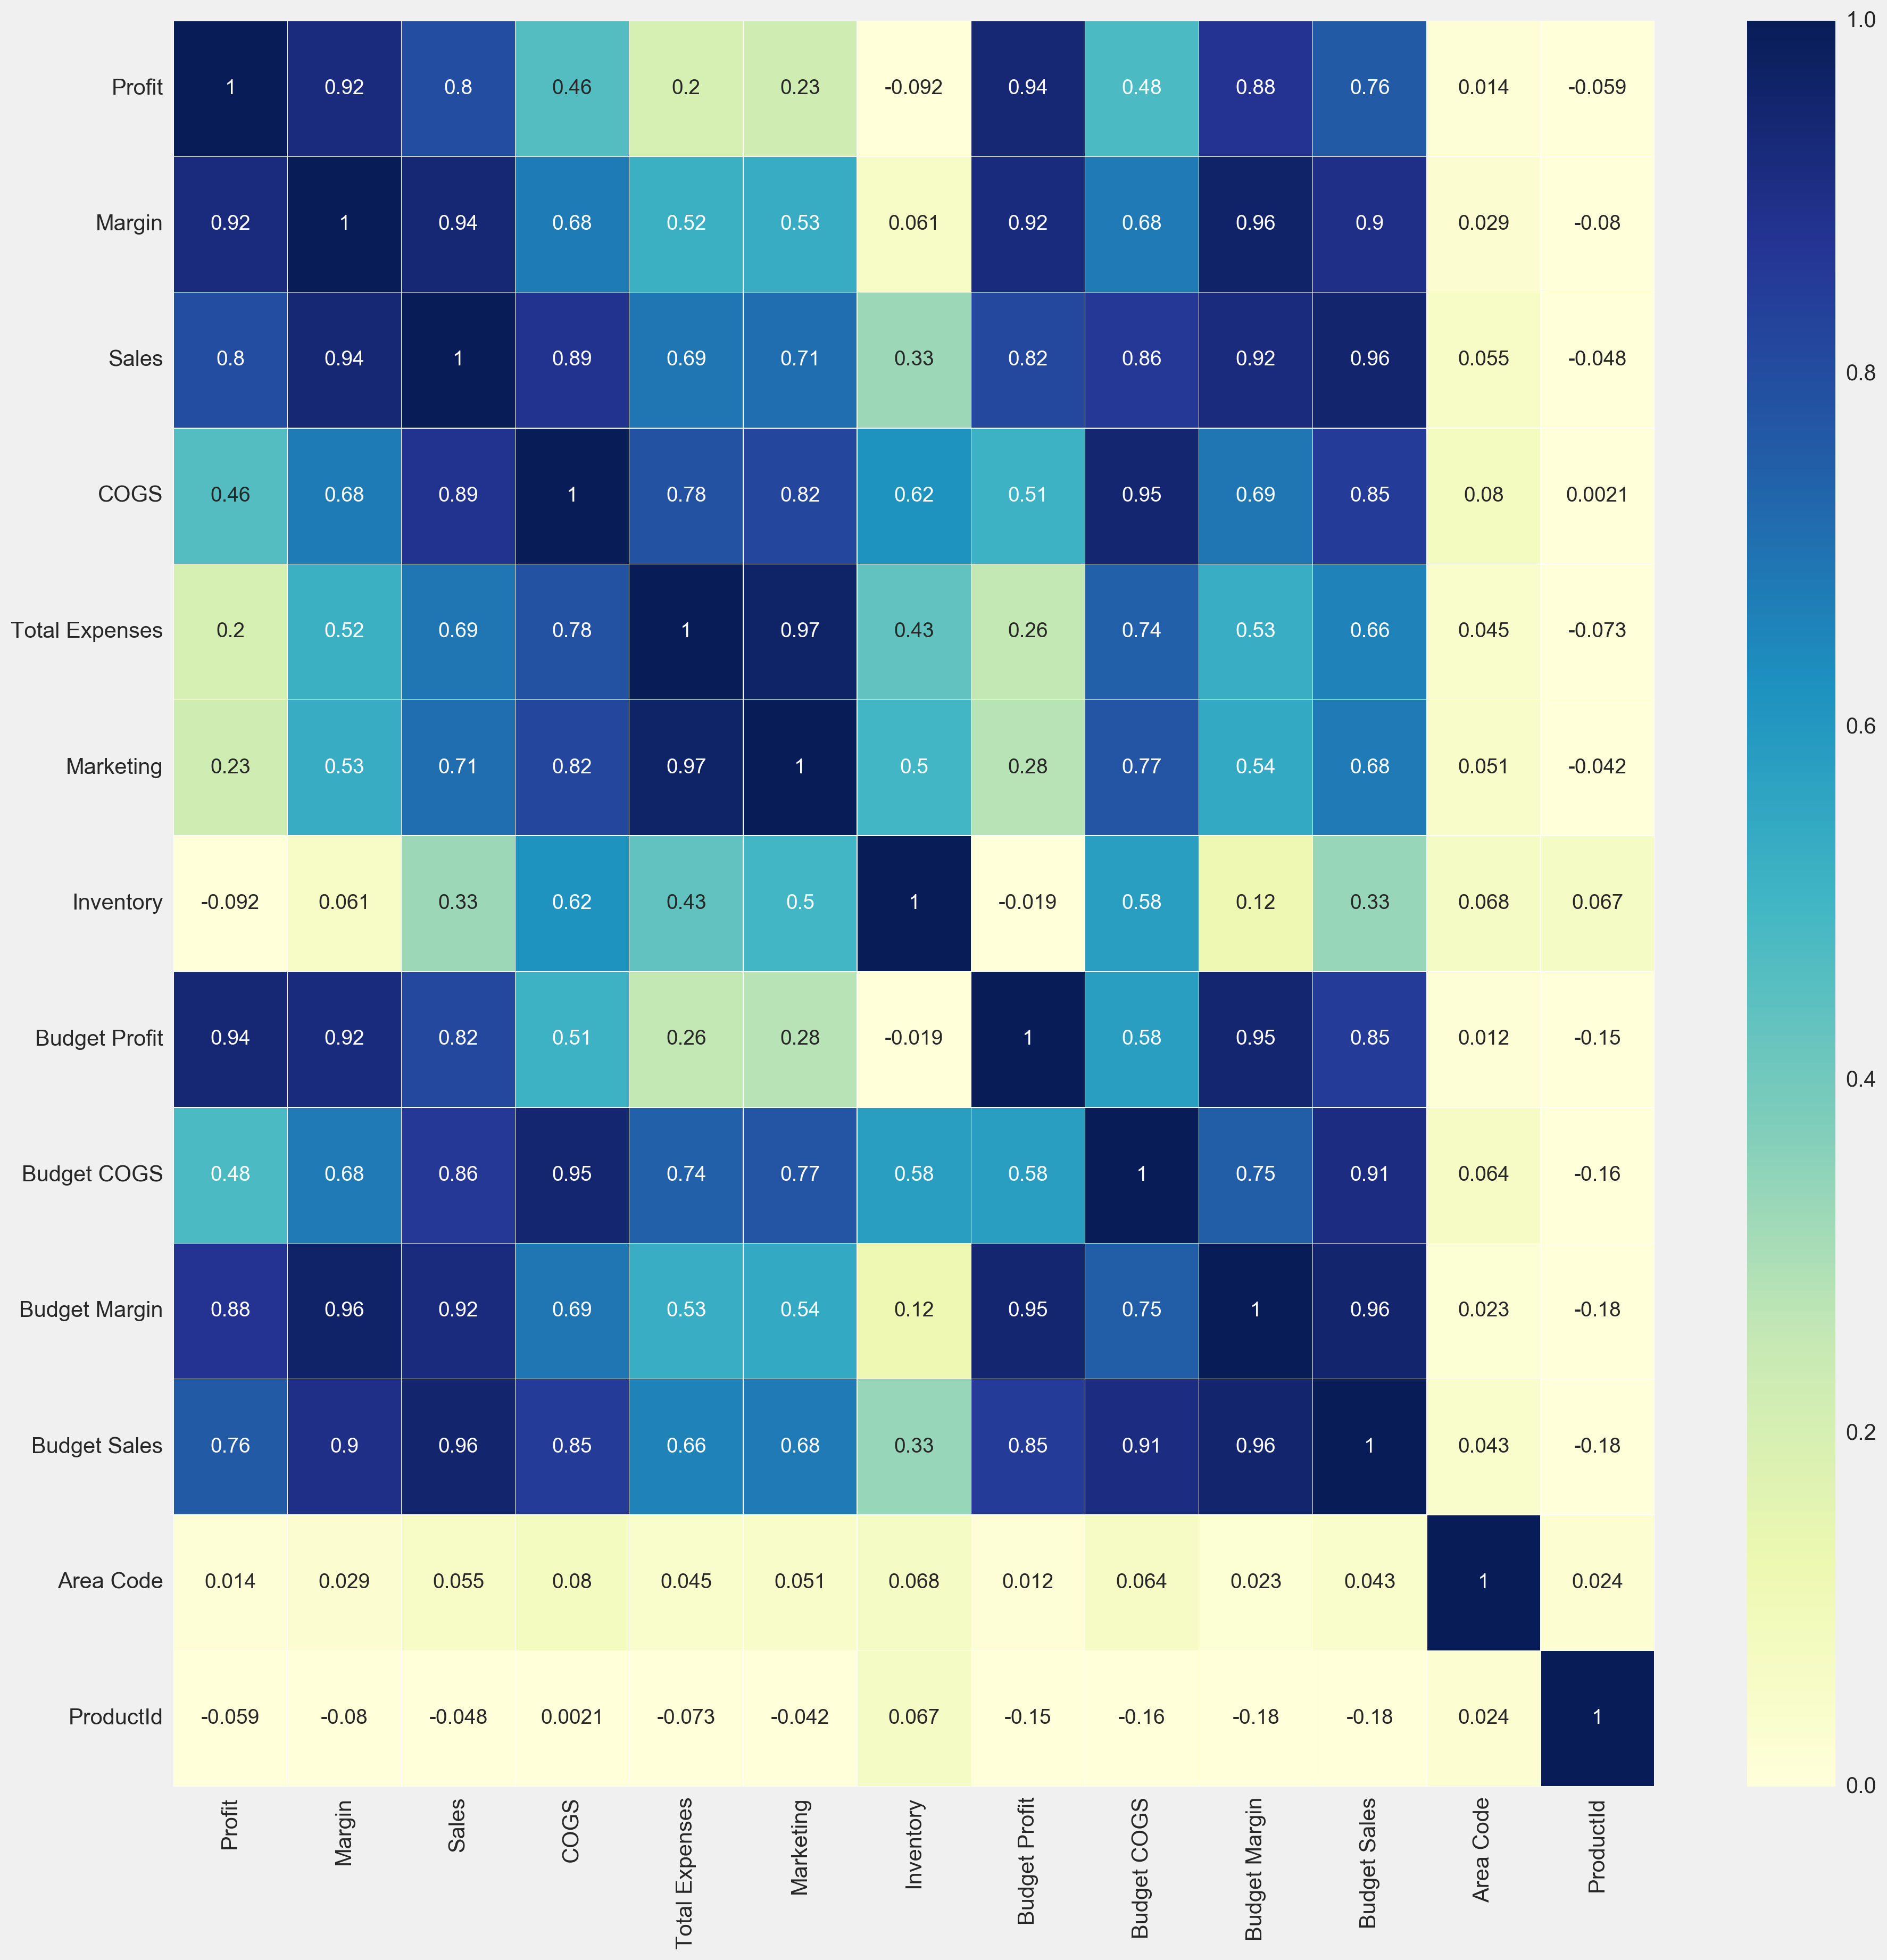

In [770]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(coffee_chain.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [711]:
### Most of the variables are positive related to profit,except inventory.

In [795]:
## rename variables
coffee_chain.rename(columns={
    'Total Expenses':'Total_Expenses',
    'Budget Profit':'Budget_Profit',
    'Budget COGS':'Budget_COGS',
    'Budget Margin':'Budget_Margin',
    'Budget Sales':'Budget_Sales',
    'Area Code':'Area_Code',
   
    },inplace=True)

In [796]:
coffee_chain.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total_Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget_Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget_COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget_Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


In [797]:
coffee_chain.drop(['Area_Code','Market','Market Size'
    ],axis=1, inplace=True)

In [799]:
coffee_chain.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,1,2010-01-01,Colorado,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,1,2010-01-06,Colorado,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,1,2010-01-12,Colorado,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,1,2011-01-01,Colorado,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,1,2011-01-06,Colorado,Coffee,Amaretto,Regular


---
##Data Visualizing
---

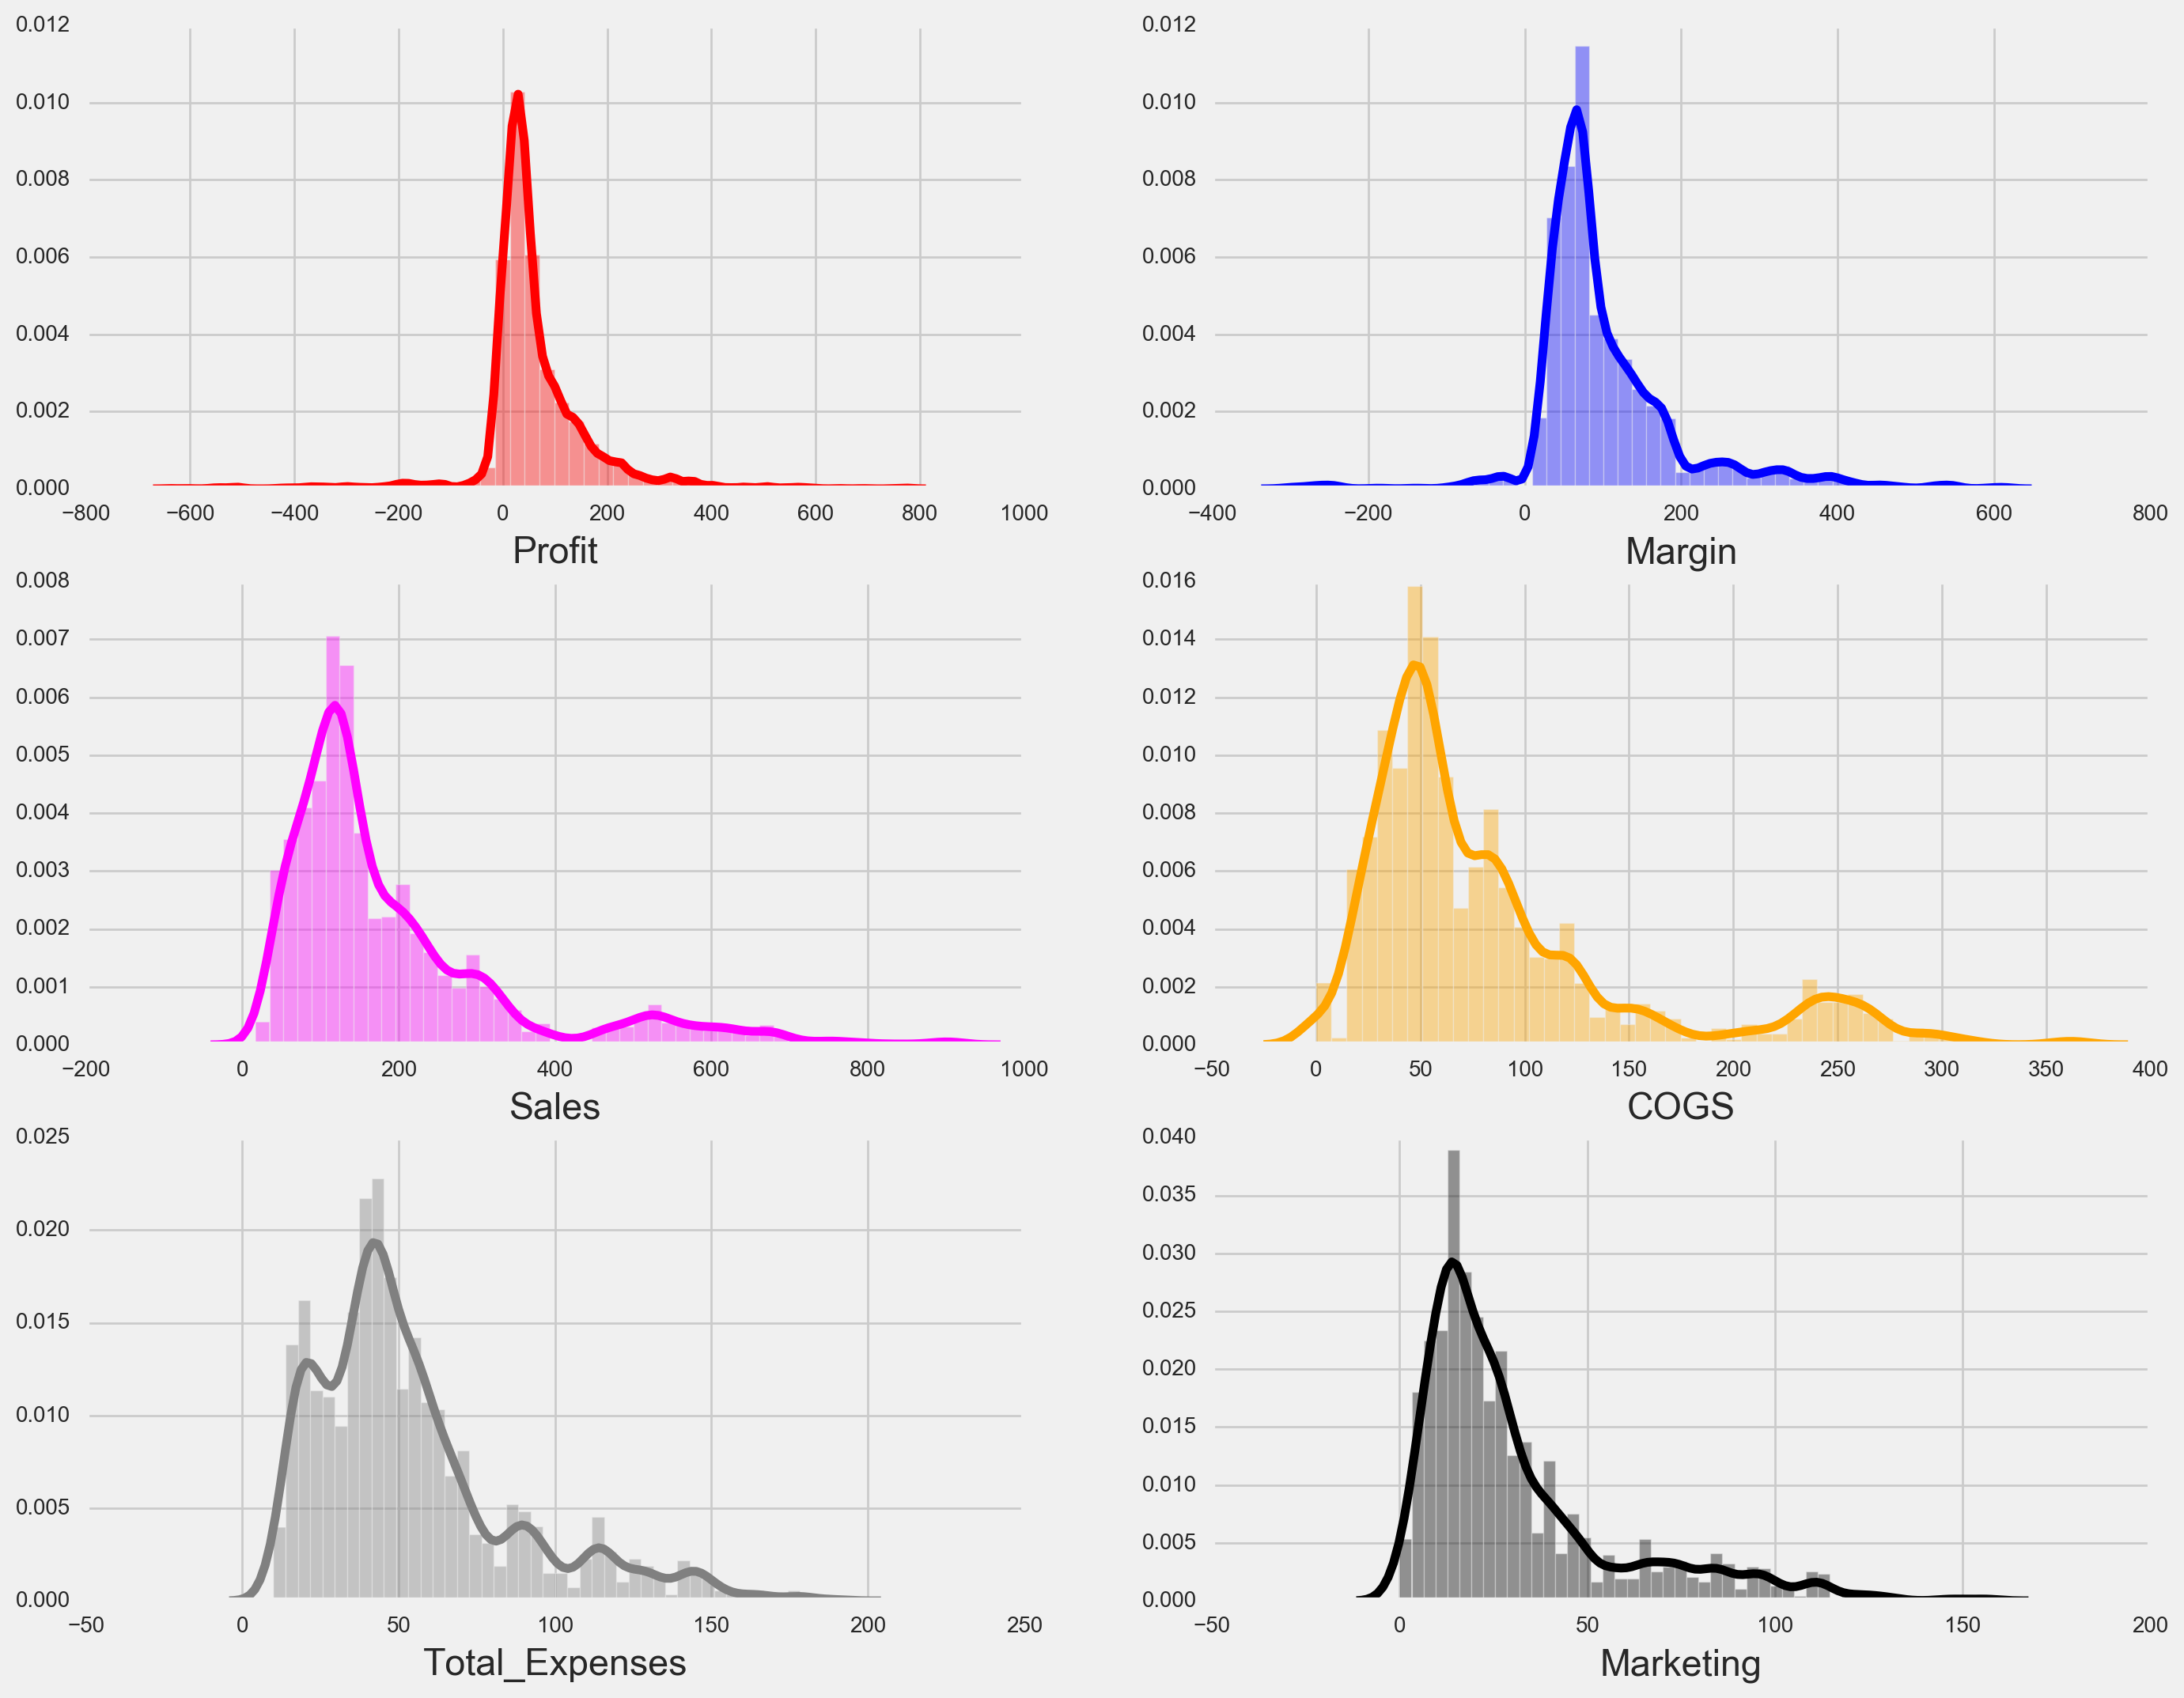

In [133]:
fig, axarr = plt.subplots(3, 2, figsize=(15,12),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(coffee_chain.Profit, ax=axarr[0,0], color='red')

axarr[0,1] = sns.distplot(coffee_chain.Margin,ax=axarr[0,1], color='blue')       
                          
axarr[1,0] = sns.distplot(coffee_chain.Sales, ax=axarr[1,0], color='magenta')

axarr[1,1] = sns.distplot(coffee_chain.COGS, ax=axarr[1,1], color='orange')

axarr[2,0] = sns.distplot(coffee_chain.Total_Expenses, ax=axarr[2,0], color='grey')

axarr[2,1] = sns.distplot(coffee_chain.Marketing, ax=axarr[2,1], color='black')

plt.show()

### The distribution result shows that all the variables have a command distribution pattern:skew to the left. We should take a log transformation or square root transformation to adjust a more linear relatioship in the parameters.And the Profit distribution results shows there are some negative profit value.

---
1.Profitbility analysis: 
---

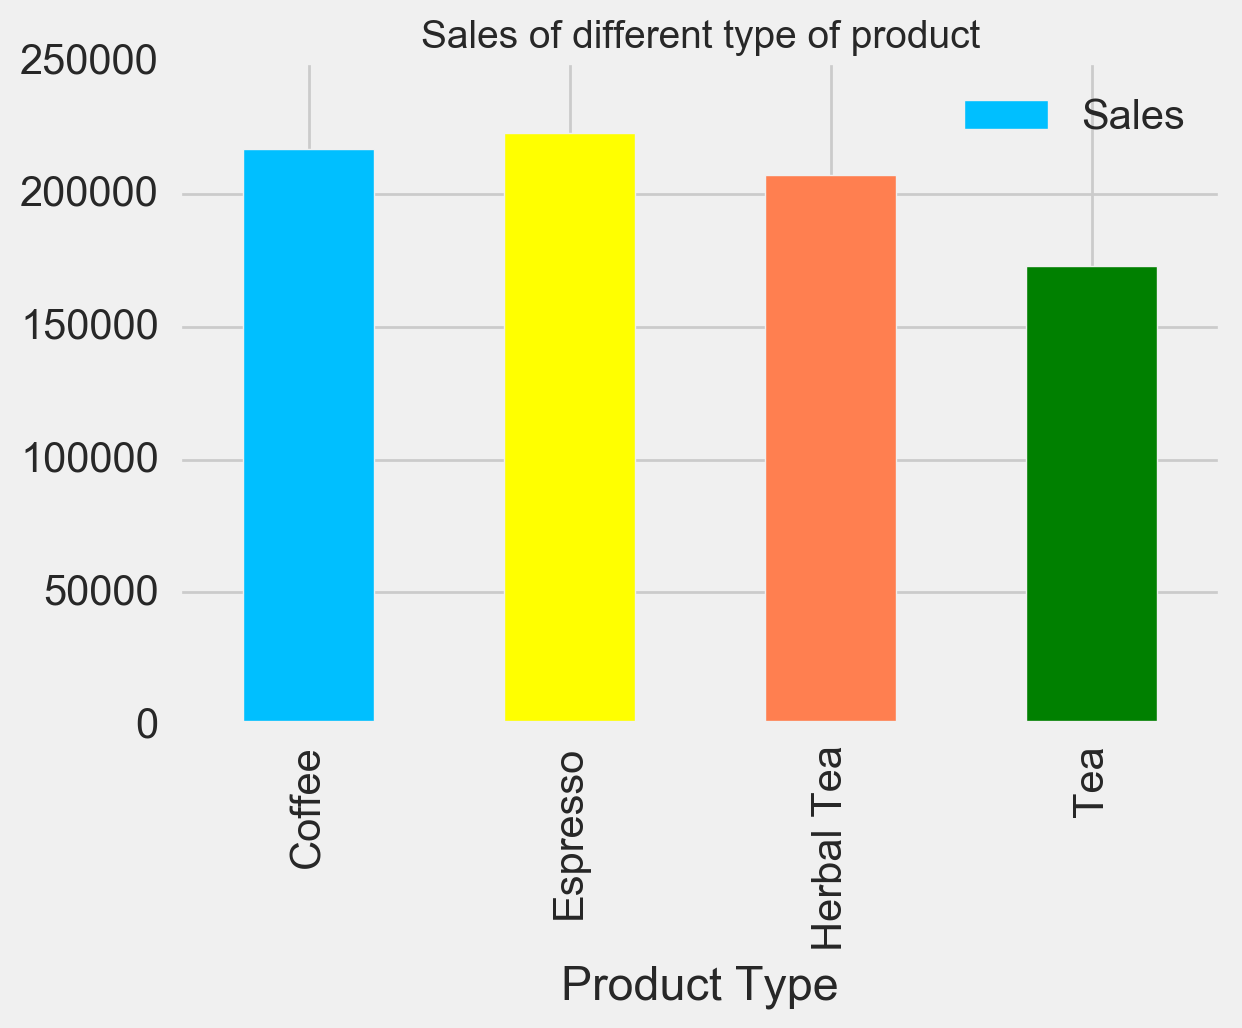

In [800]:
coffee_chain.groupby( ['Product Type'] )[ ['Sales'] ].sum().plot(kind="bar",
                                                                           color=['deepskyblue', 'yellow','coral','green']
                                                                         )
plt.title('Sales of different type of product', fontsize=14)
plt.show()

In [801]:
### Top sale is Espresso category,and worse sale is tea category. 
### Groupby Product to find out the details of each type of product.


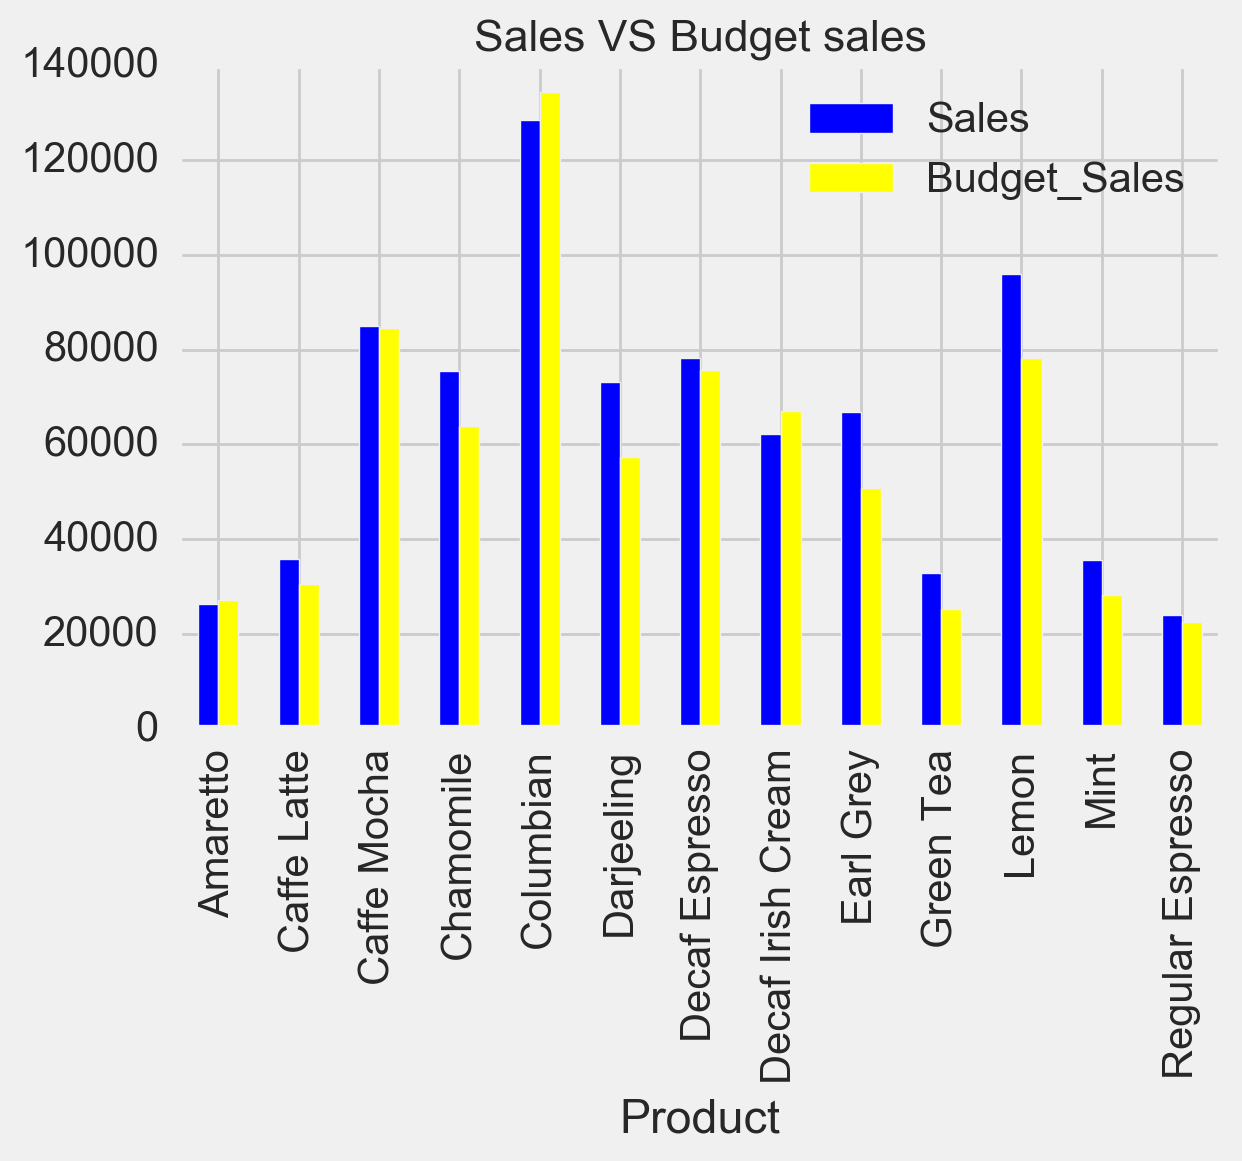

In [802]:
coffee_chain.groupby( ['Product'] )[ ['Sales','Budget_Sales'] ].sum().plot(kind="bar",
                                                                           color=['blue', 'yellow']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()

In [804]:
### First of all, Tea category
coffee_chain_tea = coffee_chain['Product Type'] == 'Tea'
coffee_chain_1=coffee_chain[coffee_chain_tea]
coffee_chain_1.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type
672,17,72,130,58,55,22,338,20,40,70,110,11,2010-01-01,Colorado,Tea,Darjeeling,Regular
673,18,73,132,59,55,22,331,10,50,60,110,11,2010-01-02,Colorado,Tea,Darjeeling,Regular
674,11,64,115,51,53,19,396,20,40,60,100,11,2010-01-06,Colorado,Tea,Darjeeling,Regular
675,15,69,124,55,54,20,410,20,40,60,100,11,2010-01-11,Colorado,Tea,Darjeeling,Regular
676,26,72,145,58,58,22,338,20,40,70,110,11,2011-01-01,Colorado,Tea,Darjeeling,Regular


In [805]:
### group the profit by states, and sort the column in a ascending sequence
profit_state=coffee_chain_1.groupby(['State']).sum()['Profit'].reset_index()
print profit_state.sort(['Profit'],ascending=True)

            State  Profit
13           Utah       3
8          Nevada      98
7        Missouri     109
15      Wisconsin     917
6   Massachusetts    1199
9   New Hampshire    1256
2     Connecticut    1832
3         Florida    2287
14     Washington    2367
1        Colorado    2464
4        Illinois    3700
11           Ohio    5029
12         Oregon    5523
0      California    7107
10       New York    8984
5            Iowa   10111


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


### Utah's total profit just 3, which means tea products are" troubled product" in Utah, the firm needs to pay attention and have some stretegy to solve this problem. And let's make the analysis more specific.

In [806]:
coffee_chain_1.groupby( ['Product', 'State'] )[ ['Profit'] ].sum()

Profit
Product    State                
Darjeeling California       3418
           Colorado          366
           Connecticut      1220
           Florida           941
           Illinois         2332
           Iowa             4487
           Massachusetts     708
           Missouri          363
           Nevada           6580
           New Hampshire     377
           New York         3254
           Ohio             2305
           Oregon            487
           Utah             -155
           Washington       1454
           Wisconsin         916
Earl Grey  California       2334
           Colorado          826
           Illinois         1368
           Iowa             5624
           Missouri         -209
           Nevada           4498
           New York         3404
           Ohio             2724
           Oregon           2310
           Utah              365
           Washington        919
           Wisconsin           1
Green Tea  California       1355
           Colorado         1272
           Connecticut       612
           Florida          1346
           Massachusetts     491
           Missouri          -45
           Nevada         -10980
           New Hampshire     879
           New York         2326
           Oregon           2726
           Utah             -207
           Washington         -6

In tea category, Darjeeling in Utah;Earl Grey in Missouri; Green Tea in Missouri,Nevada,Utah gained loss.Especially, Green Tea loss -10980 in Nevada

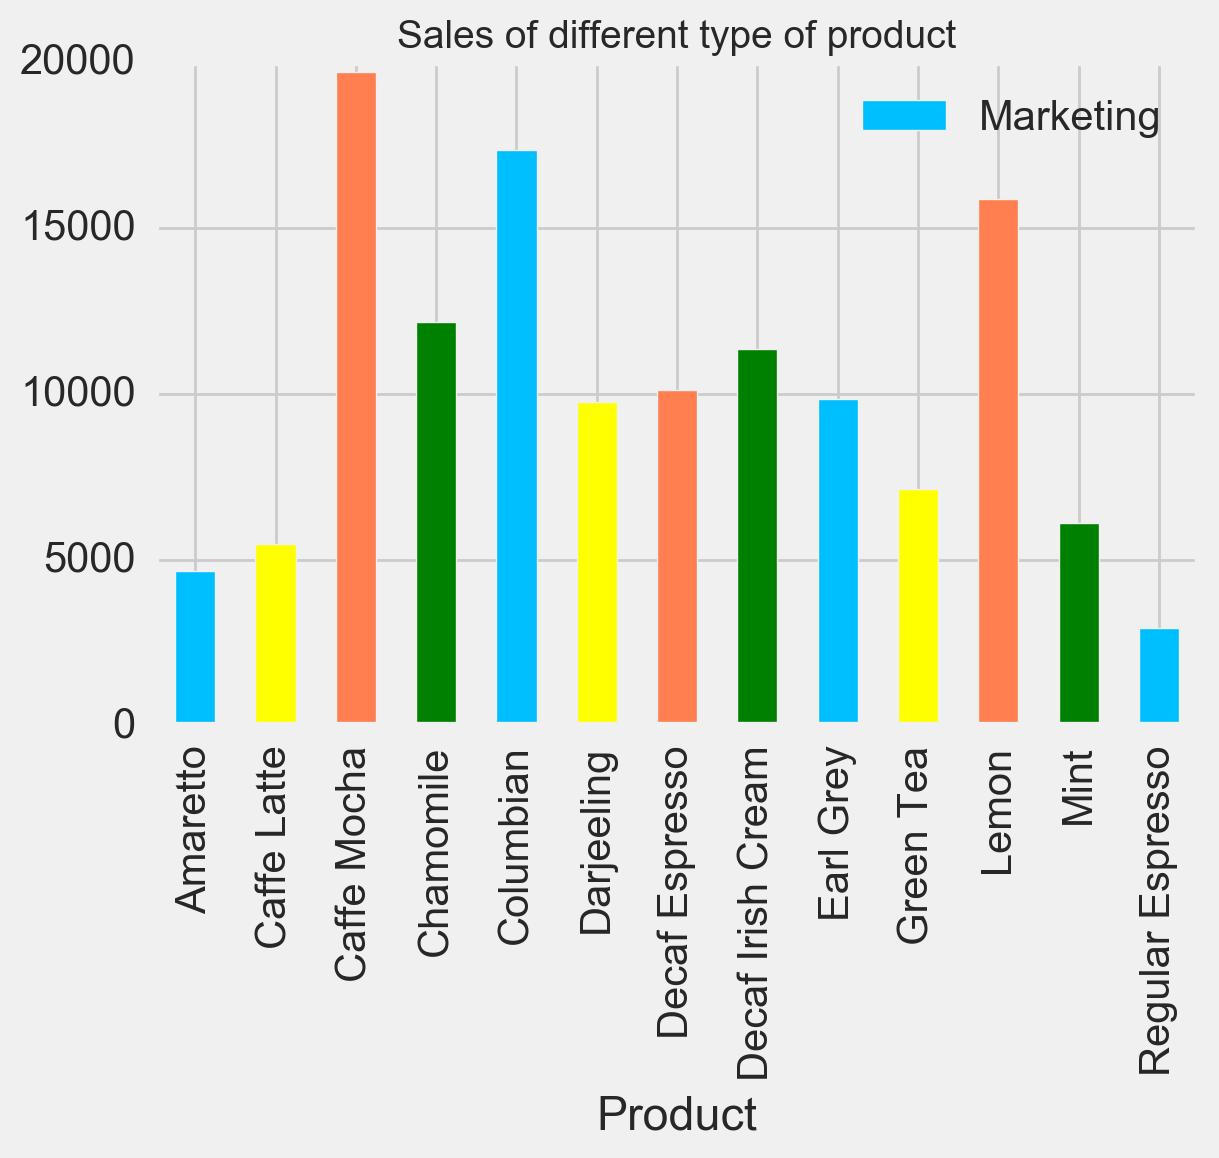

In [807]:
coffee_chain.groupby( ['Product'] )[ ['Marketing'] ].sum().plot(kind="bar",
                                                                           color=['deepskyblue', 'yellow','coral','green']
                                                                         )
plt.title('Sales of different type of product', fontsize=14)
plt.show()

In [808]:
### Secondly, Herbal Tea category
coffee_chain_herbal_tea = coffee_chain['Product Type'] == 'Herbal Tea'
coffee_chain_2=coffee_chain[coffee_chain_herbal_tea]
coffee_chain_2

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type
192,0,87,150,63,87,57,435,20,50,80,130,9,2010-01-01,Colorado,Herbal Tea,Lemon,Decaf
193,-4,73,125,52,77,47,433,20,40,70,110,9,2010-01-04,Colorado,Herbal Tea,Lemon,Decaf
194,-14,52,88,37,58,33,513,0,30,40,70,9,2011-01-08,Colorado,Herbal Tea,Lemon,Decaf
195,-9,65,119,47,71,42,521,0,40,60,100,9,2011-01-12,Colorado,Herbal Tea,Lemon,Decaf
196,10,111,190,79,101,72,551,30,70,110,180,9,2010-01-01,Oklahoma,Herbal Tea,Lemon,Decaf
197,25,154,264,110,129,100,665,40,100,150,250,9,2010-01-06,Oklahoma,Herbal Tea,Lemon,Decaf
198,34,184,317,133,150,120,705,60,120,190,310,9,2010-01-08,Oklahoma,Herbal Tea,Lemon,Decaf
199,16,130,223,93,114,84,692,40,80,130,210,9,2010-01-09,Oklahoma,Herbal Tea,Lemon,Decaf
200,15,130,224,94,115,85,694,20,80,120,200,9,2010-01-11,Oklahoma,Herbal Tea,Lemon,Decaf
201,20,145,250,105,125,95,716,30,90,140,230,9,2010-01-12,Oklahoma,Herbal Tea,Lemon,Decaf


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


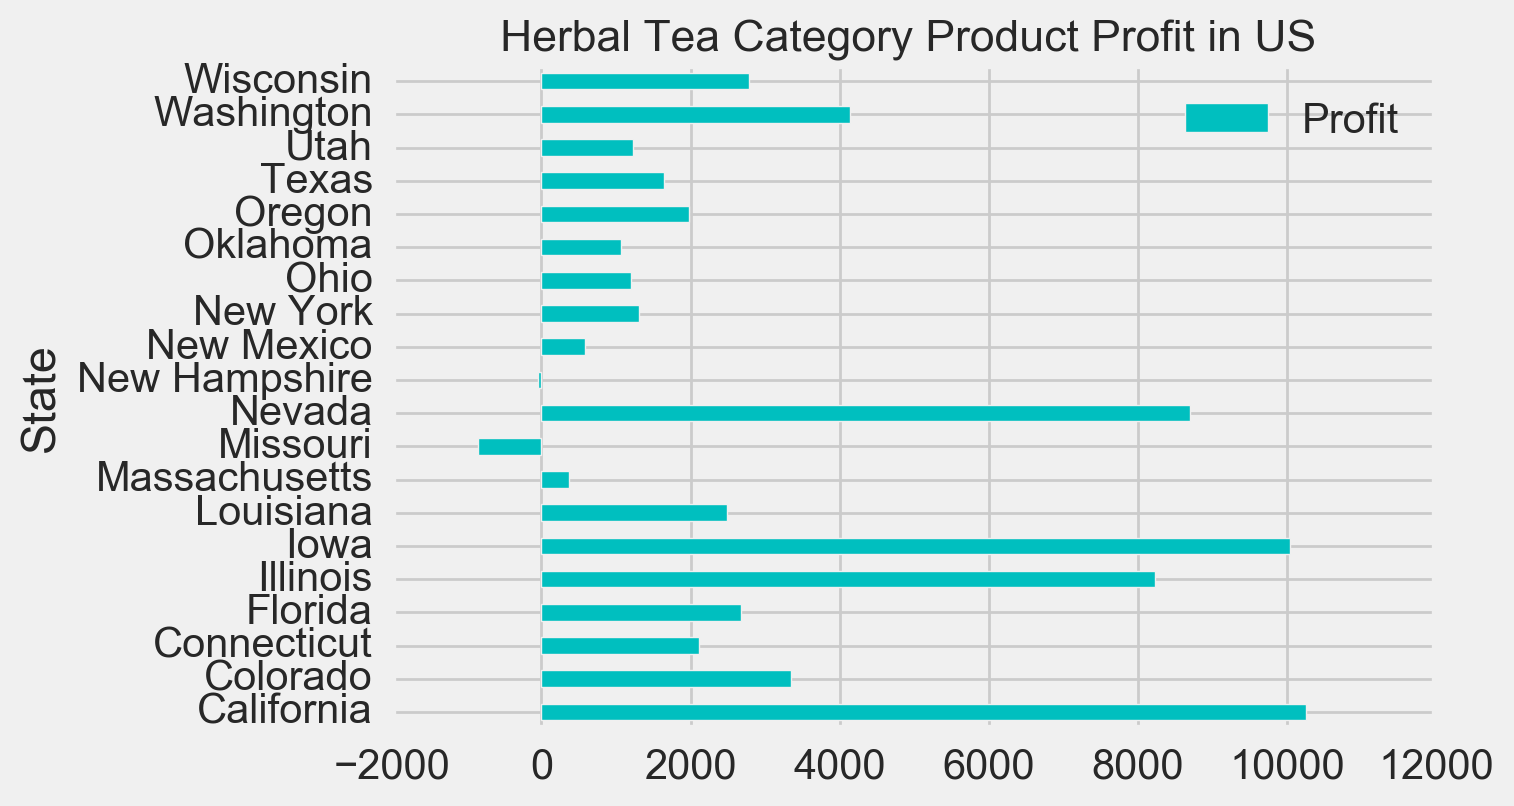

In [809]:
coffee_chain_2['Profit']=pd.to_numeric(coffee_chain_2['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_2.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='c')
plt.title('Herbal Tea Category Product Profit in US ', fontsize=16)
plt.show()

In [142]:
### group the profit by states, and sort the column in a ascending sequence
profit_state_2=coffee_chain_2.groupby(['State']).sum()['Profit'].reset_index()
print profit_state_2.sort(['Profit'],ascending=True)

            State  Profit
8        Missouri    -854
10  New Hampshire     -41
7   Massachusetts     366
11     New Mexico     577
14       Oklahoma    1065
13           Ohio    1201
17           Utah    1232
12       New York    1312
16          Texas    1638
15         Oregon    1975
2     Connecticut    2114
6       Louisiana    2491
3         Florida    2672
19      Wisconsin    2788
1        Colorado    3352
18     Washington    4140
4        Illinois    8227
9          Nevada    8699
5            Iowa   10043
0      California   10257


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


### The total profit of herbal tea category in Missouri and New Mexico are negative.

In [405]:
coffee_chain_2.groupby( ['Product', 'State'] )[ ['Profit'] ].sum()

Profit
Product   State                
Chamomile California       3252
          Colorado         2678
          Florida           764
          Illinois         3404
          Iowa             6577
          Louisiana        1500
          Missouri         -168
          Nevada            886
          New Mexico        376
          Ohio              494
          Oklahoma          494
          Oregon            707
          Texas             808
          Utah             1010
          Washington       2999
          Wisconsin        1450
Lemon     California       5450
          Colorado         -141
          Connecticut       988
          Florida           497
          Illinois         1569
          Iowa             3466
          Louisiana         991
          Massachusetts     366
          Missouri         -686
          Nevada           4356
          New Hampshire     -41
          New Mexico        201
          New York         6092
          Ohio              707
          Oklahoma          571
          Oregon           1268
          Texas             830
          Utah              906
          Washington       1141
          Wisconsin        1338
Mint      California       1555
          Colorado          815
          Connecticut      1126
          Florida          1411
          Illinois         3254
          Nevada           3457
          New York        -4780
          Utah             -684

In [143]:
### Third, Espresso category
coffee_chain_espresso = coffee_chain['Product Type'] == 'Espresso'
coffee_chain_3=coffee_chain[coffee_chain_espresso]
coffee_chain_3

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
1440,84,117,198,81,33,22,441,110,90,140,230,719,5,2010-01-03,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1441,99,136,230,94,37,26,562,140,100,170,270,719,5,2010-01-06,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1442,125,117,211,81,33,22,460,110,90,140,230,719,5,2011-01-04,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1443,145,145,243,100,37,28,598,130,110,170,280,719,5,2011-01-08,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1444,125,118,212,81,34,22,588,110,90,140,230,719,5,2011-01-09,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1445,16,32,53,21,16,5,454,30,10,30,40,580,5,2010-01-04,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1446,13,30,50,20,17,5,482,30,10,30,40,580,5,2010-01-09,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1447,24,44,73,29,20,8,490,20,20,30,50,580,5,2010-01-12,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1448,44,48,90,32,21,8,456,40,20,40,60,580,5,2011-01-01,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1449,25,34,60,22,17,6,452,30,10,30,40,580,5,2011-01-02,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


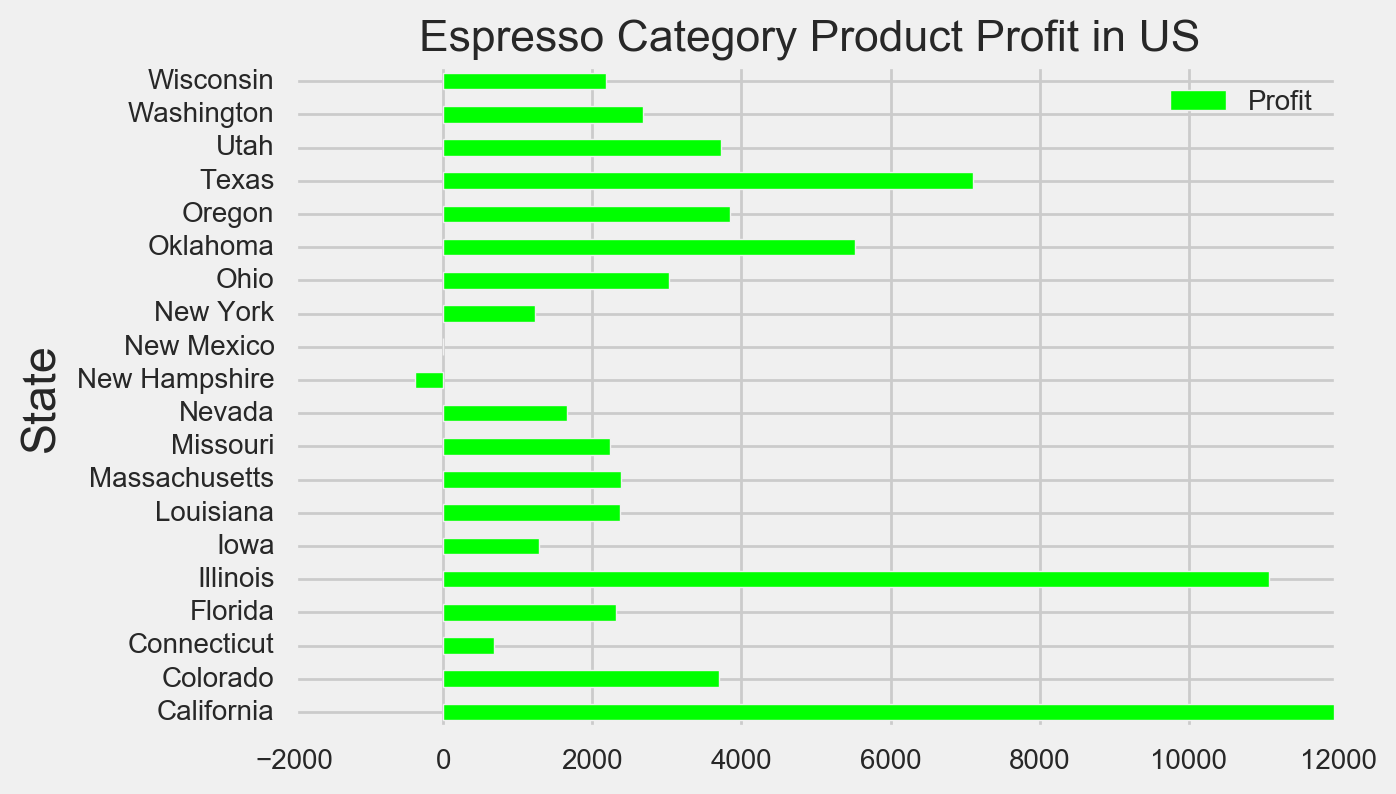

In [144]:
coffee_chain_3['Profit']=pd.to_numeric(coffee_chain_3['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_3.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='lime')
plt.title('Espresso Category Product Profit in US ', fontsize=16)
plt.show()

In [145]:
### group the profit by states, and sort the column in a ascending sequence
profit_state_3=coffee_chain_3.groupby(['State']).sum()['Profit'].reset_index()
print profit_state_3.sort(['Profit'],ascending=True)

            State  Profit
10  New Hampshire    -375
11     New Mexico       2
2     Connecticut     676
12       New York    1235
5            Iowa    1284
9          Nevada    1656
19      Wisconsin    2184
8        Missouri    2236
3         Florida    2320
6       Louisiana    2376
7   Massachusetts    2388
18     Washington    2674
13           Ohio    3027
1        Colorado    3701
17           Utah    3730
15         Oregon    3847
14       Oklahoma    5519
16          Texas    7108
4        Illinois   11069
0      California   11963


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


The total profit of espresso category in New Hampshire and New Mexico are negative.


In [406]:
coffee_chain_3.groupby( ['Product', 'State'] )[ ['Profit'] ].sum()

Profit
Product          State                
Caffe Latte      California       4497
                 Louisiana           0
                 Nevada            873
                 New Mexico       -207
                 Oklahoma         2723
                 Oregon            357
                 Texas            1357
                 Utah             1008
                 Washington        767
Caffe Mocha      California        886
                 Colorado         2339
                 Connecticut         3
                 Florida           582
                 Illinois         6575
                 Iowa              413
                 Louisiana        1455
                 Massachusetts    -297
                 Missouri         1225
                 Nevada            374
                 New Hampshire    -166
                 New Mexico       -160
                 New York        -6354
                 Ohio             2672
                 Oklahoma          492
                 Oregon            818
                 Texas            3415
                 Utah             1500
                 Washington        488
                 Wisconsin        1418
Decaf Espresso   California       6580
                 Colorado         1362
                 Connecticut       673
                 Florida          1738
                 Illinois         4494
                 Iowa              871
                 Louisiana         921
                 Missouri         1011
                 Nevada            409
                 New Mexico        369
                 Ohio              355
                 Oklahoma         2304
                 Oregon           2672
                 Texas            2336
                 Utah             1222
                 Washington       1419
                 Wisconsin         766
Regular Espresso Massachusetts    2685
                 New Hampshire    -209
                 New York         7589

For Espresso category, Caffe Latte in New Mexico and Louisiana; Caffe Mocha	in Massachusetts,New Hampshire, New Mexico,and New York; Regular Espresso New Hampshire's profit are negative.

In [147]:
### Coffee category
coffee_chain_coffee = coffee_chain['Product Type'] == 'Coffee'
coffee_chain_4=coffee_chain[coffee_chain_coffee]
coffee_chain_4

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,2010-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,2010-01-12,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,2011-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,2011-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
5,197,179,322,123,46,34,915,160,120,180,300,719,1,2011-01-10,Colorado,Central,Major Market,Coffee,Amaretto,Regular
6,190,172,309,118,44,33,930,130,110,170,280,719,1,2011-01-11,Colorado,Central,Major Market,Coffee,Amaretto,Regular
7,46,90,165,75,44,23,956,70,90,110,200,435,1,2010-01-02,Utah,West,Small Market,Coffee,Amaretto,Regular
8,45,89,163,74,44,22,949,70,90,110,200,435,1,2010-01-03,Utah,West,Small Market,Coffee,Amaretto,Regular
9,47,91,167,76,44,23,965,70,90,110,200,435,1,2010-01-04,Utah,West,Small Market,Coffee,Amaretto,Regular


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


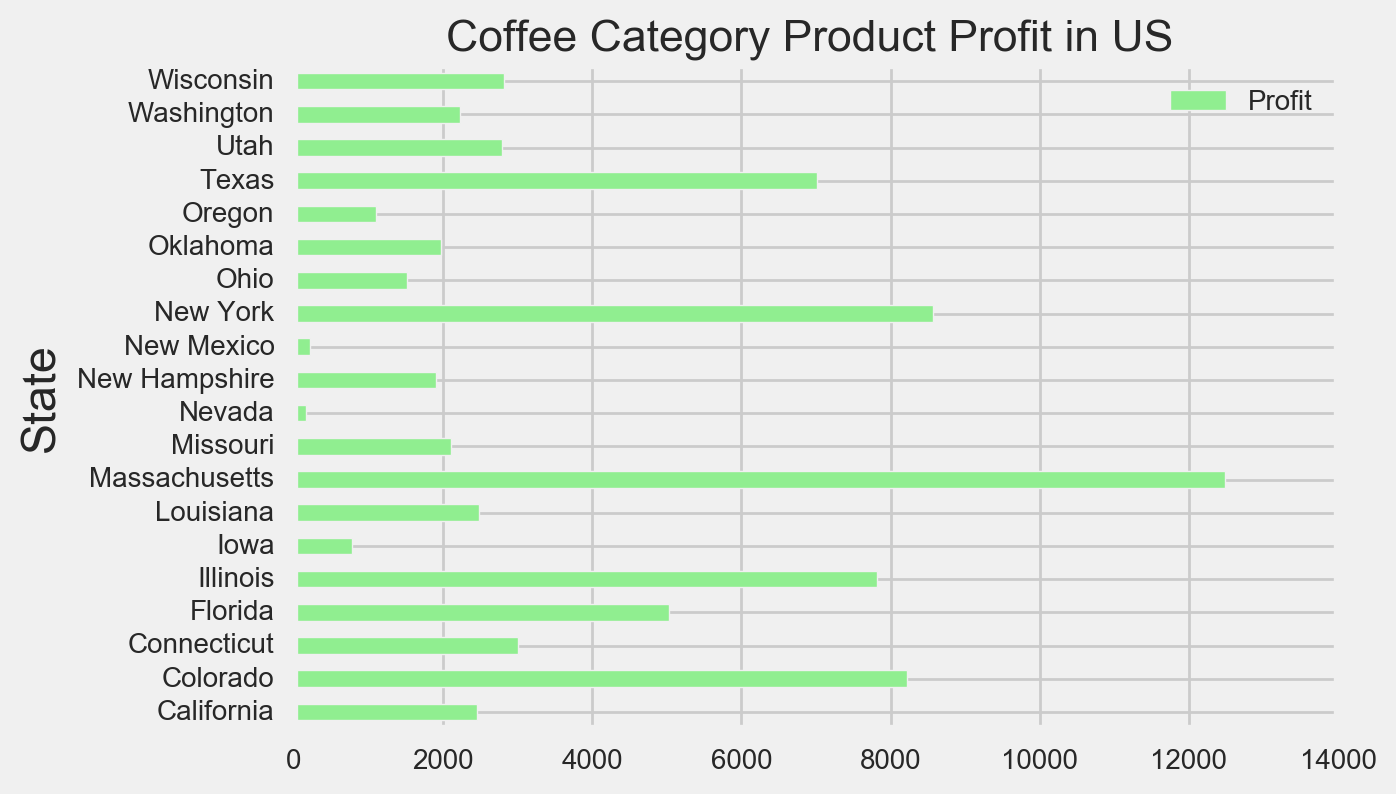

In [148]:
coffee_chain_4['Profit']=pd.to_numeric(coffee_chain_4['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_4.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='lightgreen')
plt.title('Coffee Category Product Profit in US ', fontsize=16)
plt.show()

Only coffee category does not appear gain loss. Let's see which products are "all star" products and which one is underperformed.

In [408]:
coffee_chain_4.groupby( ['Product', 'State'] )[ ['Profit'] ].sum()

Profit
Product           State                
Amaretto          California      -2217
                  Colorado         3410
                  Iowa              376
                  New Hampshire    1010
                  Ohio              821
                  Oregon           -136
                  Utah             1129
                  Wisconsin         497
Columbian         California       8566
                  Colorado         1566
                  Connecticut      2999
                  Florida          2305
                  Illinois         4362
                  Iowa              209
                  Louisiana        1138
                  Massachusetts   12489
                  Missouri          987
                  Nevada            -45
                  New Hampshire     898
                  New Mexico        903
                  New York         8565
                  Ohio              826
                  Oklahoma         1274
                  Oregon            396
                  Texas            5452
                  Utah              679
                  Washington       1660
                  Wisconsin         575
Decaf Irish Cream California      -3891
                  Colorado         3250
                  Florida          2726
                  Illinois         3463
                  Iowa              189
                  Louisiana        1350
                  Missouri         1123
                  Nevada            208
                  New Mexico       -683
                  Ohio             -131
                  Oklahoma          700
                  Oregon            834
                  Texas            1568
                  Utah              978
                  Washington        564
                  Wisconsin        1741

Amaretto in California and Oregon; Columbian in Nevada; Decaf Irish Cream California and Ohio are underperformed.

Columbian in California and Massachusetts had high profits.

---

Part 2: Machine Learning
---

---
### How budget factors impact profit and how to achieve profit maximazation?
---

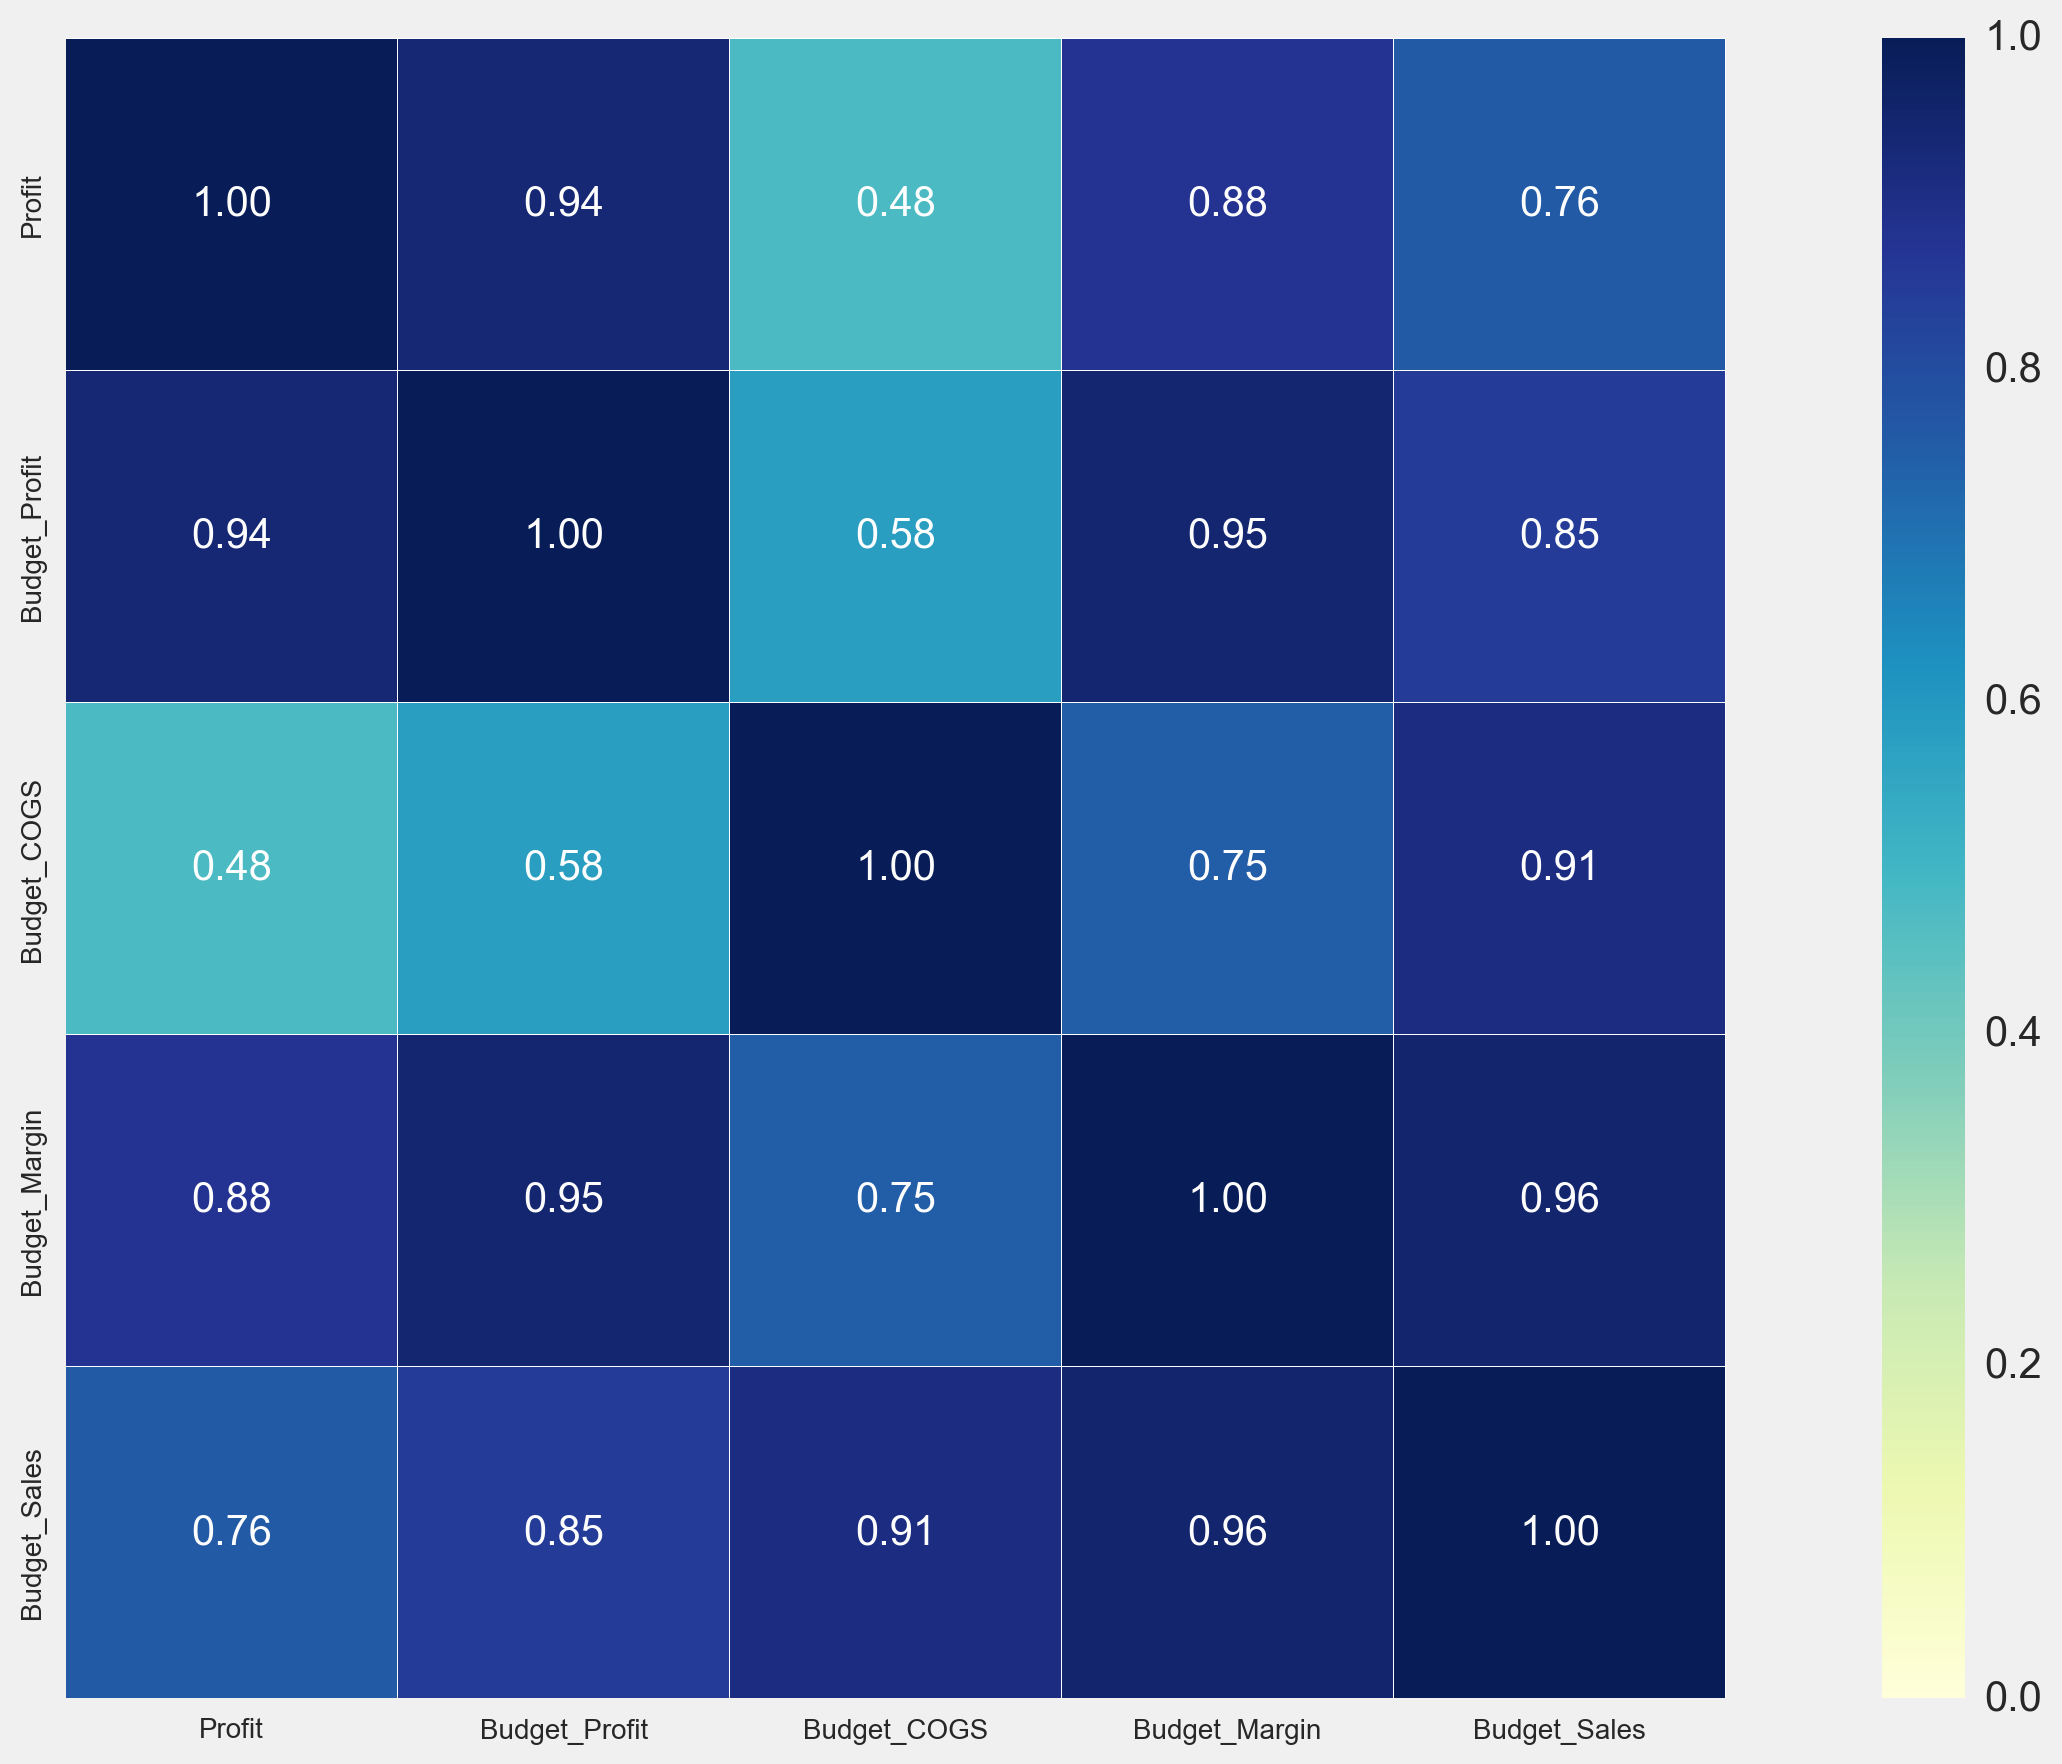

In [720]:
### heatmap for desired variables
cols = ['Profit', 'Budget_Profit', 'Budget_COGS', 'Budget_Margin', 'Budget_Sales']
fig = plt.figure(figsize=(18,10))
ax = fig.gca()

cm = np.corrcoef(coffee_chain[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 cmap="YlGnBu", 
                 vmin=0, 
                 vmax=1,
                 linewidths= .15, 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.show()

---
 
 ### Regularization
---

In [810]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Use take log transformation and drop negative values and null values.

In [884]:
coffee_chain1= coffee_chain
coffee_chain1['log_profit']=np.log10(coffee_chain['Profit'])
coffee_chain1[['log_profit','Profit']]

,log_profit,Profit
0,1.973128,94
1,2.082785,121
2,2.127105,134
3,2.164353,146
4,2.222716,167
5,2.294466,197
6,2.278754,190
7,1.662758,46
8,1.653213,45
9,1.672098,47


In [885]:
coffee_chain1

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,2010-01-01,Colorado,Coffee,Amaretto,Regular,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2010-01-06,Colorado,Coffee,Amaretto,Regular,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2010-01-12,Colorado,Coffee,Amaretto,Regular,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2011-01-01,Colorado,Coffee,Amaretto,Regular,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2011-01-06,Colorado,Coffee,Amaretto,Regular,2.222716,1
5,197,179,322,123,46,34,915,160,120,180,300,1,2011-01-10,Colorado,Coffee,Amaretto,Regular,2.294466,1
6,190,172,309,118,44,33,930,130,110,170,280,1,2011-01-11,Colorado,Coffee,Amaretto,Regular,2.278754,1
7,46,90,165,75,44,23,956,70,90,110,200,1,2010-01-02,Utah,Coffee,Amaretto,Regular,1.662758,1
8,45,89,163,74,44,22,949,70,90,110,200,1,2010-01-03,Utah,Coffee,Amaretto,Regular,1.653213,1
9,47,91,167,76,44,23,965,70,90,110,200,1,2010-01-04,Utah,Coffee,Amaretto,Regular,1.672098,1


In [886]:
coffee_chain1.loc[~(coffee_chain1['log_profit'] > 0), 'log_profit'] = 0
coffee_chain1[['log_profit','Profit']]

,log_profit,Profit
0,1.973128,94
1,2.082785,121
2,2.127105,134
3,2.164353,146
4,2.222716,167
5,2.294466,197
6,2.278754,190
7,1.662758,46
8,1.653213,45
9,1.672098,47


In [887]:
coffee_chain1.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,2010-01-01,Colorado,Coffee,Amaretto,Regular,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2010-01-06,Colorado,Coffee,Amaretto,Regular,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2010-01-12,Colorado,Coffee,Amaretto,Regular,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2011-01-01,Colorado,Coffee,Amaretto,Regular,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2011-01-06,Colorado,Coffee,Amaretto,Regular,2.222716,1


---
Logistic Regression
---

In [888]:
### Creat dummy varibale of Profit: negative value and zero =0; positive value=1

In [889]:
def binary_coffee_chain1(x):
    if x == 0:
        return 0
    else:
        return 1
    
coffee_chain1['Gain_Profit'] = coffee_chain1.log_profit.map(binary_coffee_chain1)

In [890]:
coffee_chain1.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,2010-01-01,Colorado,Coffee,Amaretto,Regular,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2010-01-06,Colorado,Coffee,Amaretto,Regular,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2010-01-12,Colorado,Coffee,Amaretto,Regular,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2011-01-01,Colorado,Coffee,Amaretto,Regular,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2011-01-06,Colorado,Coffee,Amaretto,Regular,2.222716,1


In [891]:
coffee_chain1=coffee_chain1.drop(['Type','State','Date','Product Type','Product'],axis=1)
coffee_chain1.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2.222716,1


In [892]:
coffee_chain1.Gain_Profit.value_counts()

1    3651
0     597
Name: Gain_Profit, dtype: int64

In [893]:
coffee_chain1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 4247
Data columns (total 14 columns):
Profit            4248 non-null int64
Margin            4248 non-null int64
Sales             4248 non-null int64
COGS              4248 non-null int64
Total_Expenses    4248 non-null int64
Marketing         4248 non-null int64
Inventory         4248 non-null int64
Budget_Profit     4248 non-null int64
Budget_COGS       4248 non-null int64
Budget_Margin     4248 non-null int64
Budget_Sales      4248 non-null int64
ProductId         4248 non-null int64
log_profit        4248 non-null float64
Gain_Profit       4248 non-null int64
dtypes: float64(1), int64(13)
memory usage: 497.8 KB


In [894]:
coffee_chain1_dumm = pd.get_dummies(coffee_chain1)
coffee_chain1_dumm

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2.222716,1
5,197,179,322,123,46,34,915,160,120,180,300,1,2.294466,1
6,190,172,309,118,44,33,930,130,110,170,280,1,2.278754,1
7,46,90,165,75,44,23,956,70,90,110,200,1,1.662758,1
8,45,89,163,74,44,22,949,70,90,110,200,1,1.653213,1
9,47,91,167,76,44,23,965,70,90,110,200,1,1.672098,1


In [895]:
coffee_chain1=coffee_chain1.drop(['Profit','log_profit'],axis=1)

In [896]:
columns_ = coffee_chain1.columns.tolist()
exclude_cols = ['Gain_Profit']

y = coffee_chain1.Gain_Profit.values

X = coffee_chain1[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(4248,) (4248, 11)


In [585]:
### Define train data and test data

In [897]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(2973, 11) (2973,)
(1275, 11) (1275,)


In [898]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [899]:
estimator.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 215 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 995 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1445 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1995 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2659 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  5.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [900]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 1, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced'}

Best Score on left out data:0.991 



In [901]:
'''Baseline'''
'''Remeber that 0 is gain loss 1 is make profit'''
print coffee_chain1_dumm['Gain_Profit'].value_counts(), "\n" 
print "For coffee chain business, %.0f percent of the time products make profit. " % ((np.mean(coffee_chain1_dumm['Gain_Profit']))*100)

1    3651
0     597
Name: Gain_Profit, dtype: int64 

For coffee chain business, 86 percent of the time products make profit. 


---
Model Evaluation
---

In [902]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Gain loss', 'True_Label_1 Make Money'],
                         columns=['Predict_Label_0 Gain loss', 'Predict_Label_1 Make Money'])

confusion

,Predict_Label_0 Gain loss,Predict_Label_1 Make Money
True_Label_0 Gain loss,192,0
True_Label_1 Make Money,11,1072


In [903]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       192
          1       1.00      0.99      0.99      1083

avg / total       0.99      0.99      0.99      1275



In [904]:
import imp

In [905]:
confusion = imp.load_source('confussion', '../utils/stats/confussion.py')

from confussion import show_confusion_matrix

C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Gain loss', 'Class 1 = Make Money'])

IOError: [Errno 2] No such file or directory

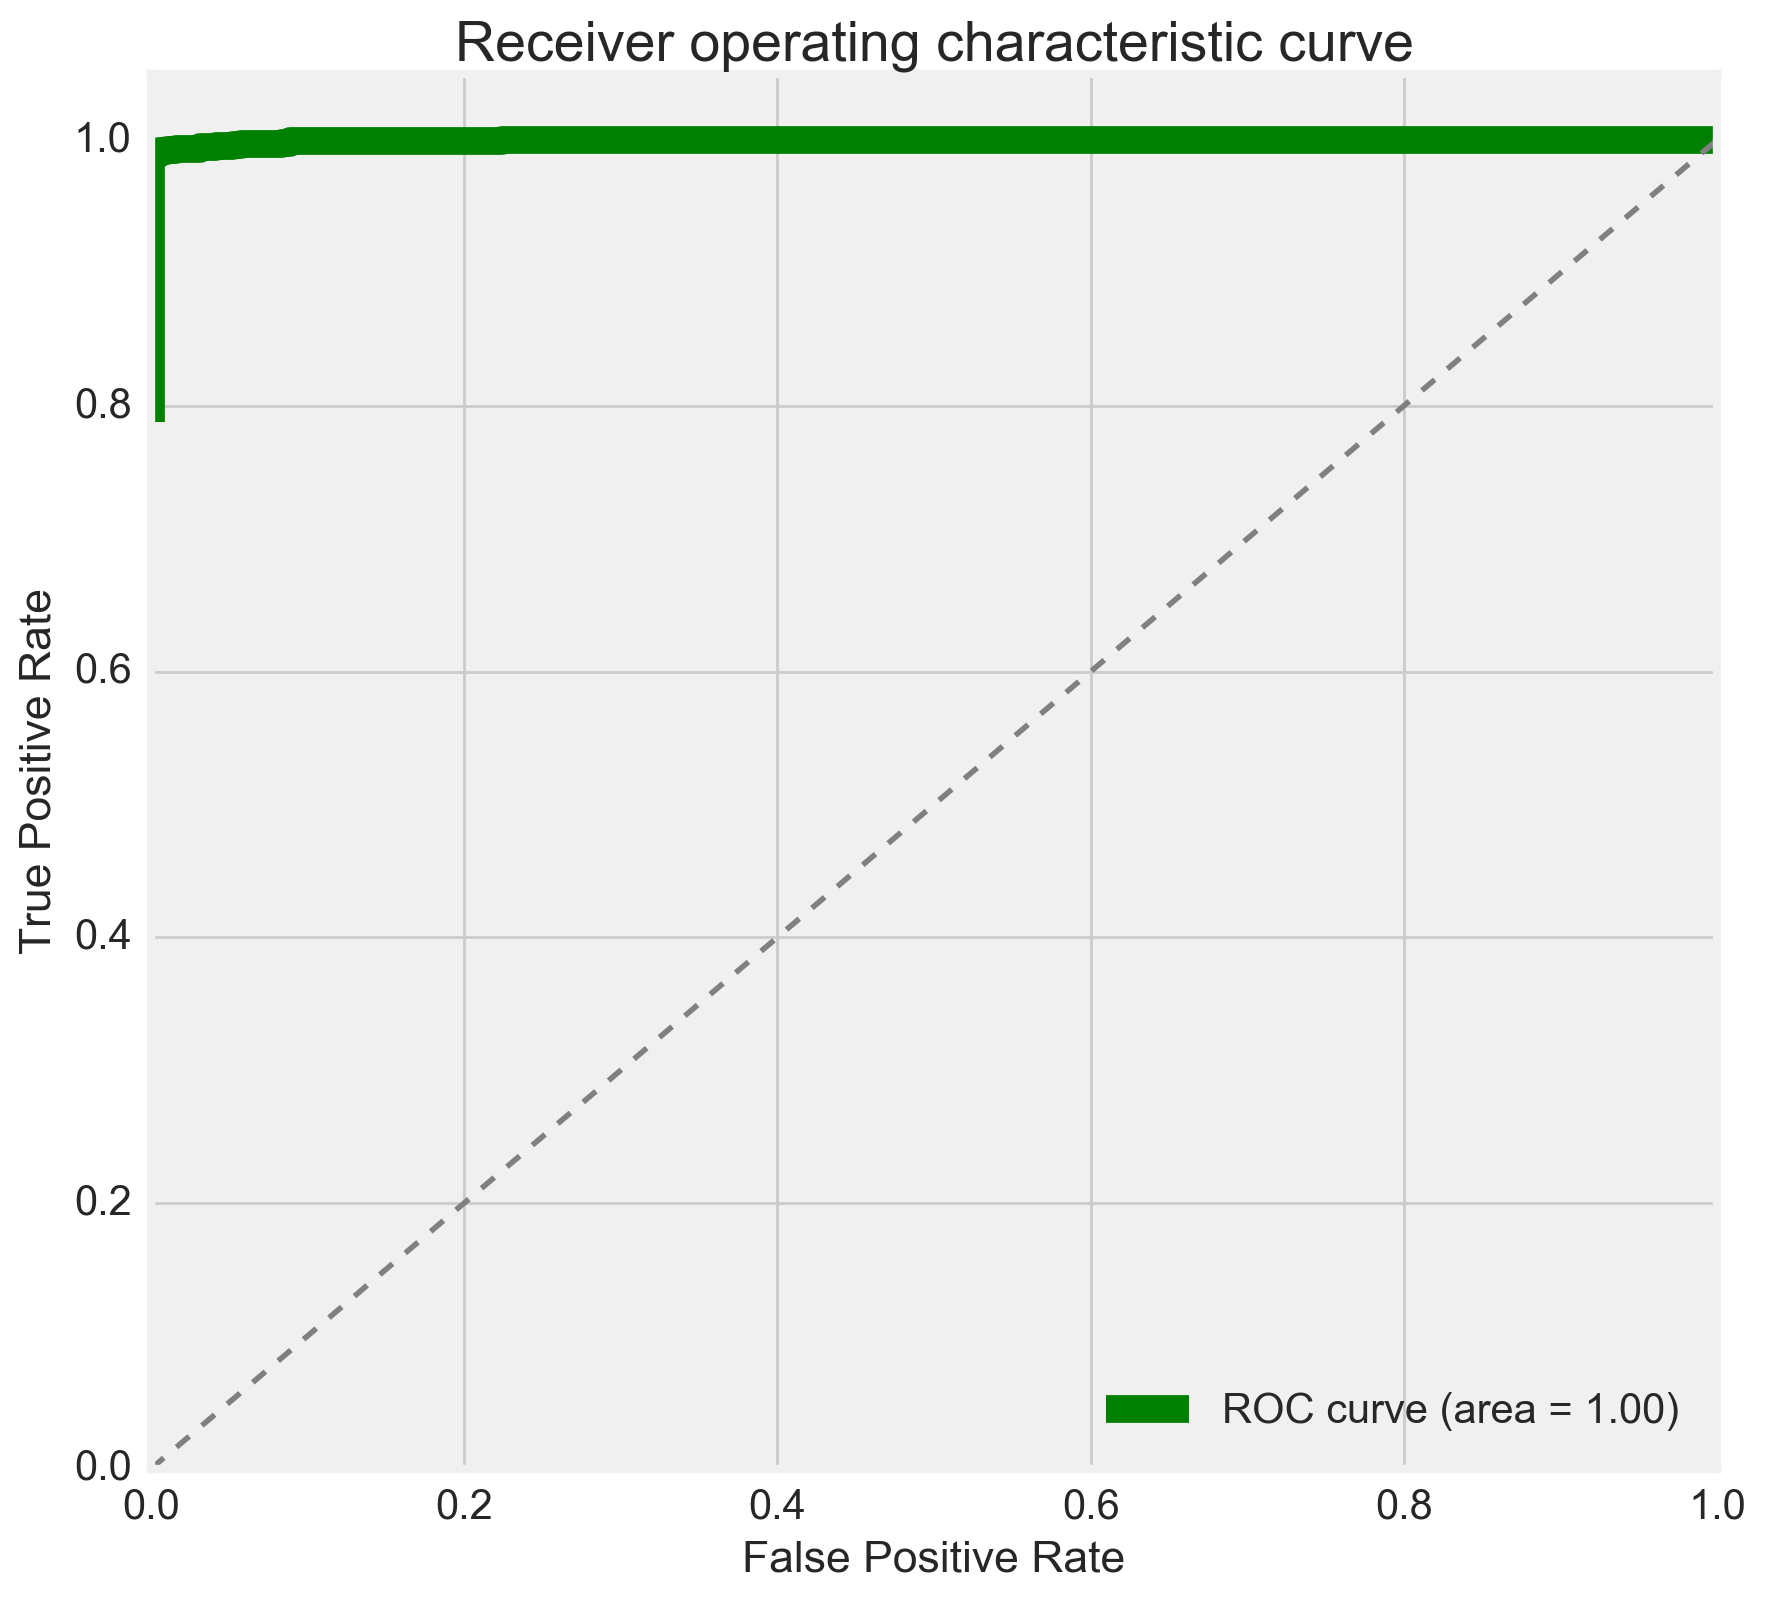

In [906]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

---
### Decison Tree
---

In [907]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [908]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [909]:
dct_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", dct_best
print ''

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best Params on hold out data (train):
{'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 20, 'min_samples_leaf': 1}


Best Score on left out data:0.993 




---
### Evaluate the Decison Tree
---

In [910]:
y_pred= gsdt.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 No_affair', 'True_Label_1 Affair'],
                         columns=['Predict_Label_0 No_affair', 'Predict_Label_1 Affair'])

confusion

,Predict_Label_0 No_affair,Predict_Label_1 Affair
True_Label_0 No_affair,182,10
True_Label_1 Affair,4,1079


In [911]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.98      0.95      0.96       192
          1       0.99      1.00      0.99      1083

avg / total       0.99      0.99      0.99      1275



In [912]:
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = gain loss', 'Class 1 = Make Money'])

NameError: name 'show_confusion_matrix' is not defined

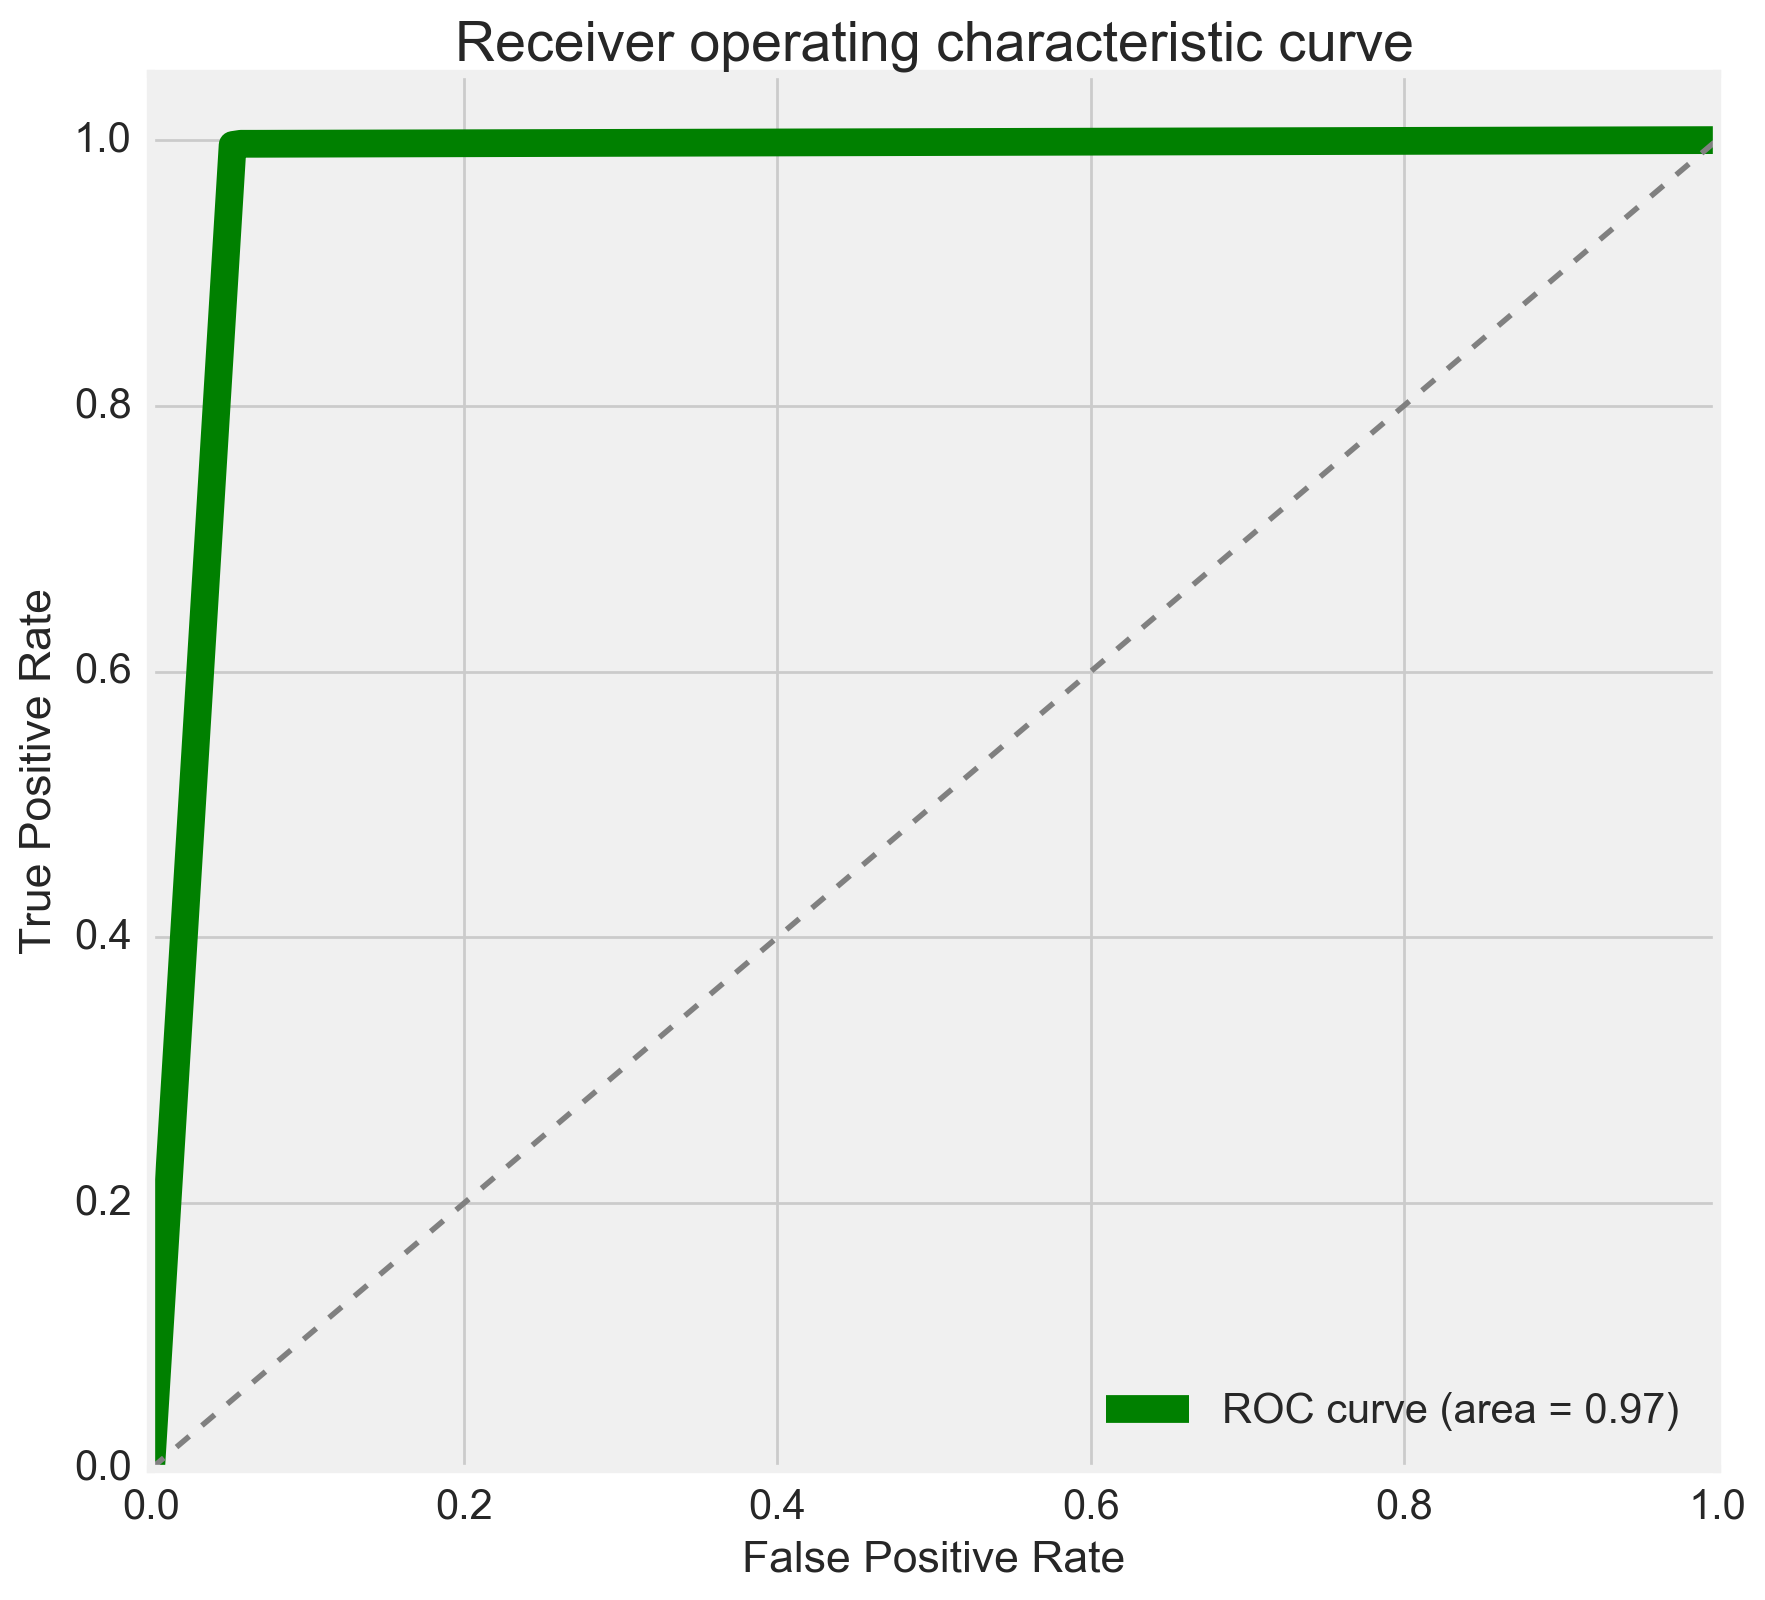

In [913]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

---
What Features are the best predictors
---

In [914]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [915]:
feature_importance(X, dct_best)

,feature,importance
6,Budget_Profit,0.676275
2,COGS,0.111370
4,Marketing,0.060863
1,Sales,0.058303
3,Total_Expenses,0.041629
0,Margin,0.024567
5,Inventory,0.018380
9,Budget_Sales,0.005144
8,Budget_Margin,0.002859
7,Budget_COGS,0.000479


---
Random Forest Classifier
---

In [917]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import BaggingClassifier

In [918]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [919]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   27.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [921]:
rfc_best = rf_gs.best_estimator_
print "Best estimators on the left out data:\n", rfc_best
print ''

print "\nBest Params on hold out data (train):\n", rf_gs.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % rf_gs.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Best Params on hold out data (train):
{'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': None}


Best Score on left out data:0.997 




---
Evaluate the RandomForestClassifier
---

In [923]:
y_pred= rfc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 No_affair', 'True_Label_1 Affair'],
                         columns=['Predict_Label_0 No_affair', 'Predict_Label_1 Affair'])

confusion

,Predict_Label_0 No_affair,Predict_Label_1 Affair
True_Label_0 No_affair,190,2
True_Label_1 Affair,3,1080


In [924]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       192
          1       1.00      1.00      1.00      1083

avg / total       1.00      1.00      1.00      1275



In [925]:
C = confusion_matrix(y_test, rf_gs.predict(X_test))
show_confusion_matrix(C, ['Class 0 = gain loss', 'Class 1 = make money'])

NameError: name 'show_confusion_matrix' is not defined

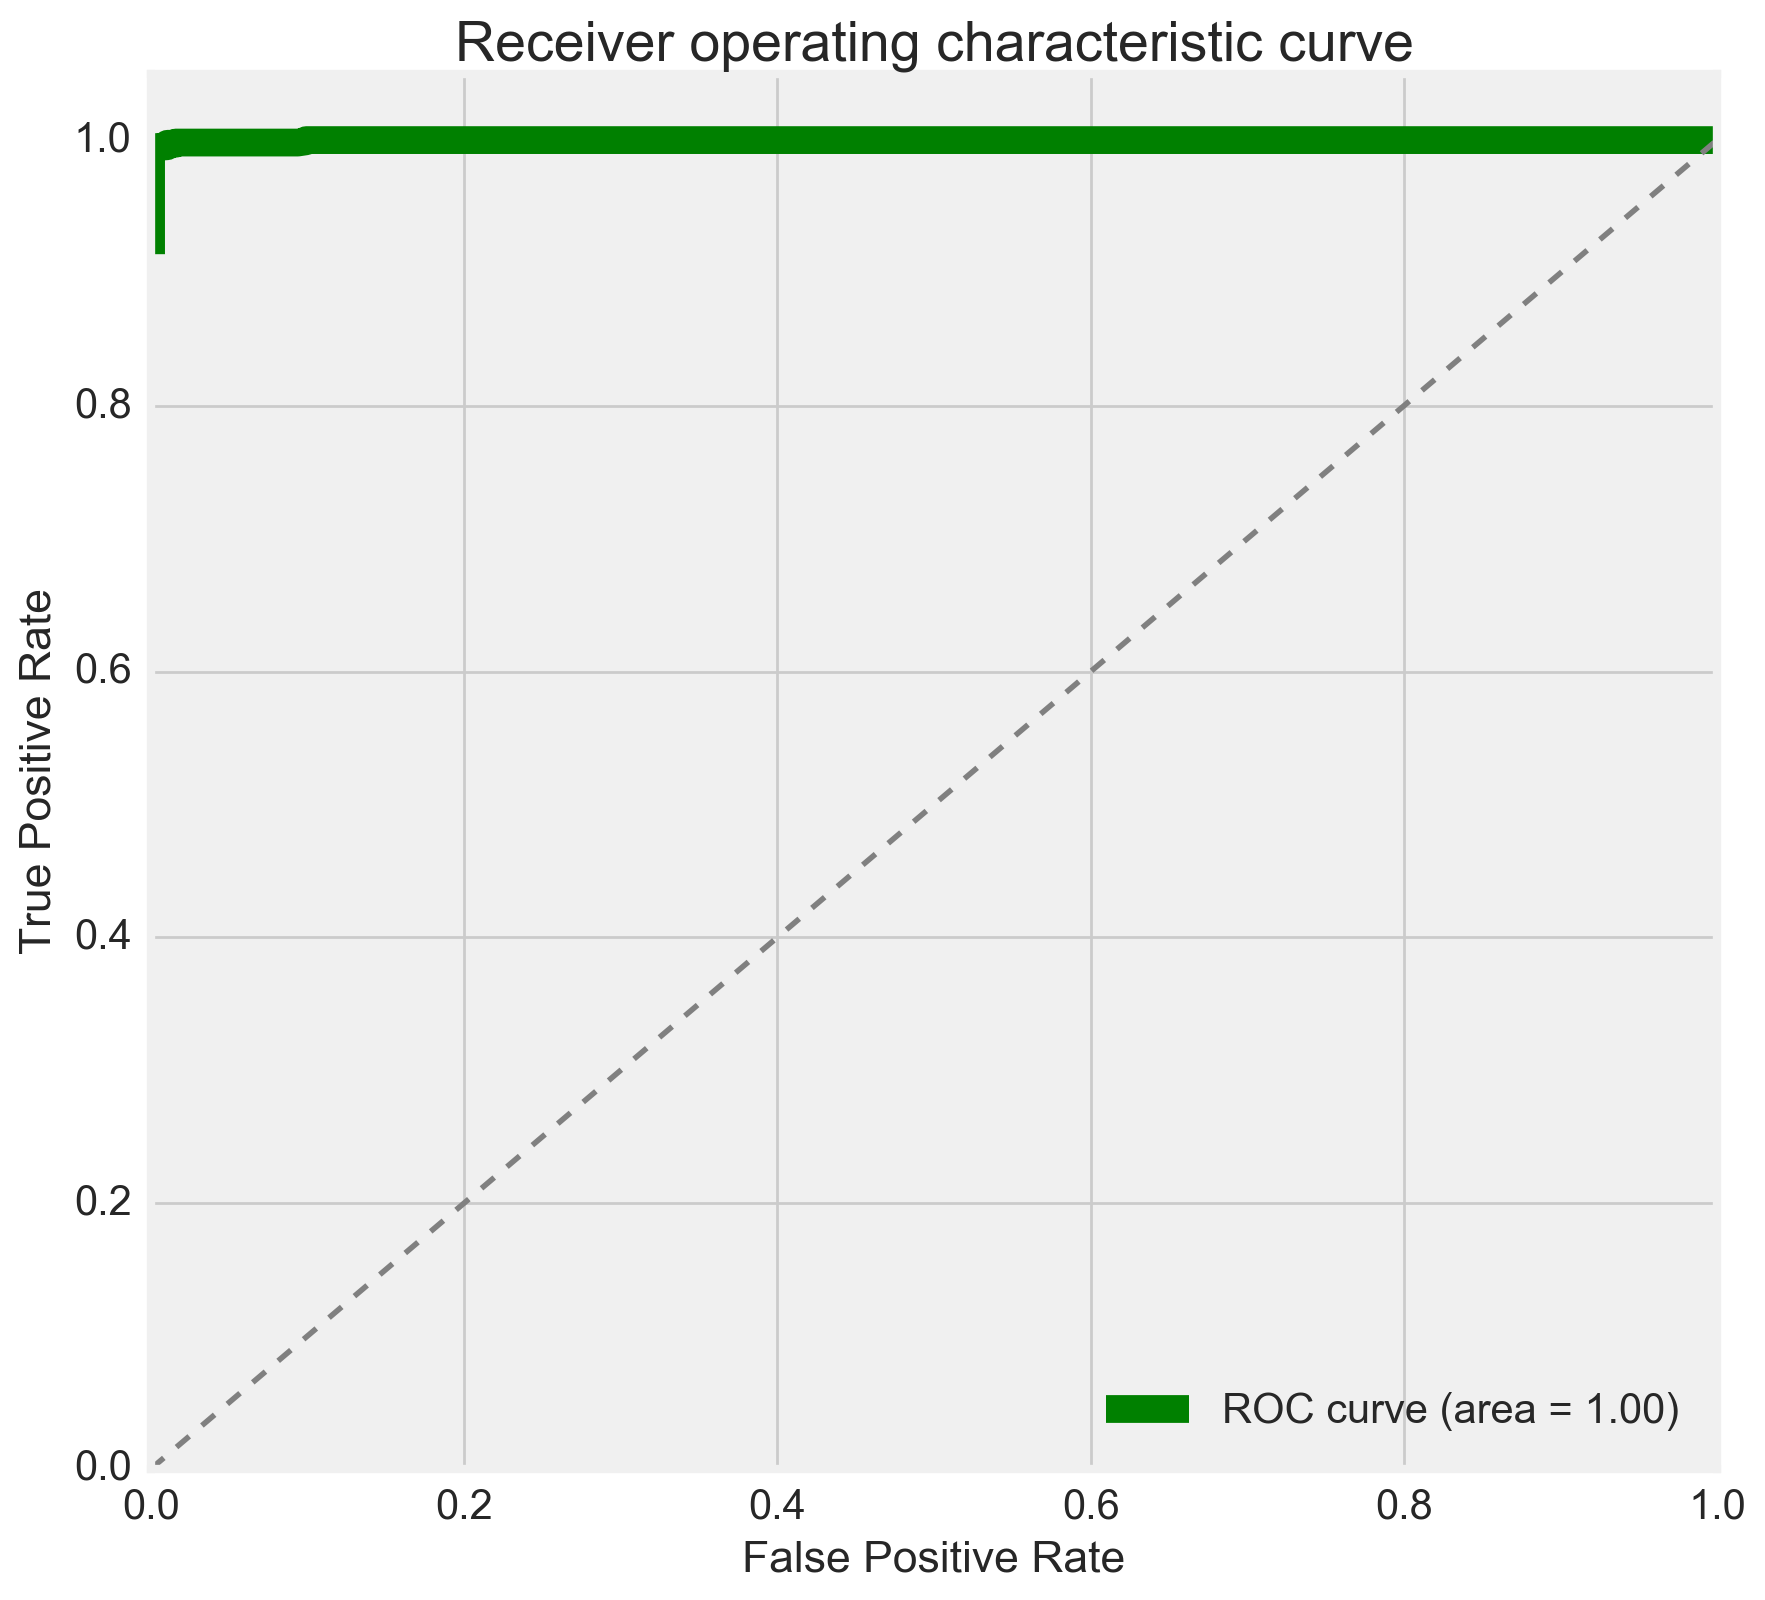

In [926]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = rf_gs.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [927]:
feature_importance(X, rfc_best)

,feature,importance
6,Budget_Profit,0.336166
0,Margin,0.169406
4,Marketing,0.118193
3,Total_Expenses,0.109827
5,Inventory,0.059412
8,Budget_Margin,0.056669
2,COGS,0.048091
1,Sales,0.041177
9,Budget_Sales,0.036910
7,Budget_COGS,0.014037


---
The Models above shows the important features of the profit prediction. From the Decison Tree and Random Forest Model , we can see the features that would affect on Profit loss or gain are: Budget_Profit,Margin,Marketing and COGS. ALL of them have positive effect on the Profit loss or gain predict.

---

---
### How to achieve profit maximization and predict profit by using budeget values  
---

---
Build a regression tree
---

In [931]:
coffee_chain.loc[~(coffee_chain['log_profit'] > 0), 'log_profit'] = 0
coffee_chain=coffee_chain.dropna(how='any')
coffee_chain=coffee_chain.loc[~coffee_chain.apply(lambda column: (column=='0').all(), axis=1)]
coffee_chain = coffee_chain[coffee_chain.log_profit != 0]
coffee_chain.head()

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,ProductId,Date,State,Product Type,Product,Type,log_profit,Gain_Profit
0,94,130,219,89,36,24,777,100,90,130,220,1,2010-01-01,Colorado,Coffee,Amaretto,Regular,1.973128,1
1,121,163,276,113,42,31,897,130,110,170,280,1,2010-01-06,Colorado,Coffee,Amaretto,Regular,2.082785,1
2,134,179,302,123,45,34,959,130,120,170,290,1,2010-01-12,Colorado,Coffee,Amaretto,Regular,2.127105,1
3,146,130,245,89,38,24,777,100,90,130,220,1,2011-01-01,Colorado,Coffee,Amaretto,Regular,2.164353,1
4,167,163,274,113,39,31,897,130,110,170,280,1,2011-01-06,Colorado,Coffee,Amaretto,Regular,2.222716,1


In [932]:
coffee_chain.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total_Expenses    0
Marketing         0
Inventory         0
Budget_Profit     0
Budget_COGS       0
Budget_Margin     0
Budget_Sales      0
ProductId         0
Date              0
State             0
Product Type      0
Product           0
Type              0
log_profit        0
Gain_Profit       0
dtype: int64

In [933]:
def dist_plotter(title, data, color):
    ''' here we set the canvas'''
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    '''here we set the components of the graph'''
    dist = sns.distplot(data, hist_kws={'alpha':0.6}, kde_kws={'linewidth':2}, color = color)
    
    '''here we define the mean and the components for the mean line'''
    dist.axvline(np.mean(data), lw=3, c='darkred', ls='--')
    average_roll = '{0:.2f}'.format(np.mean(data))
    
    '''here we add the title'''
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

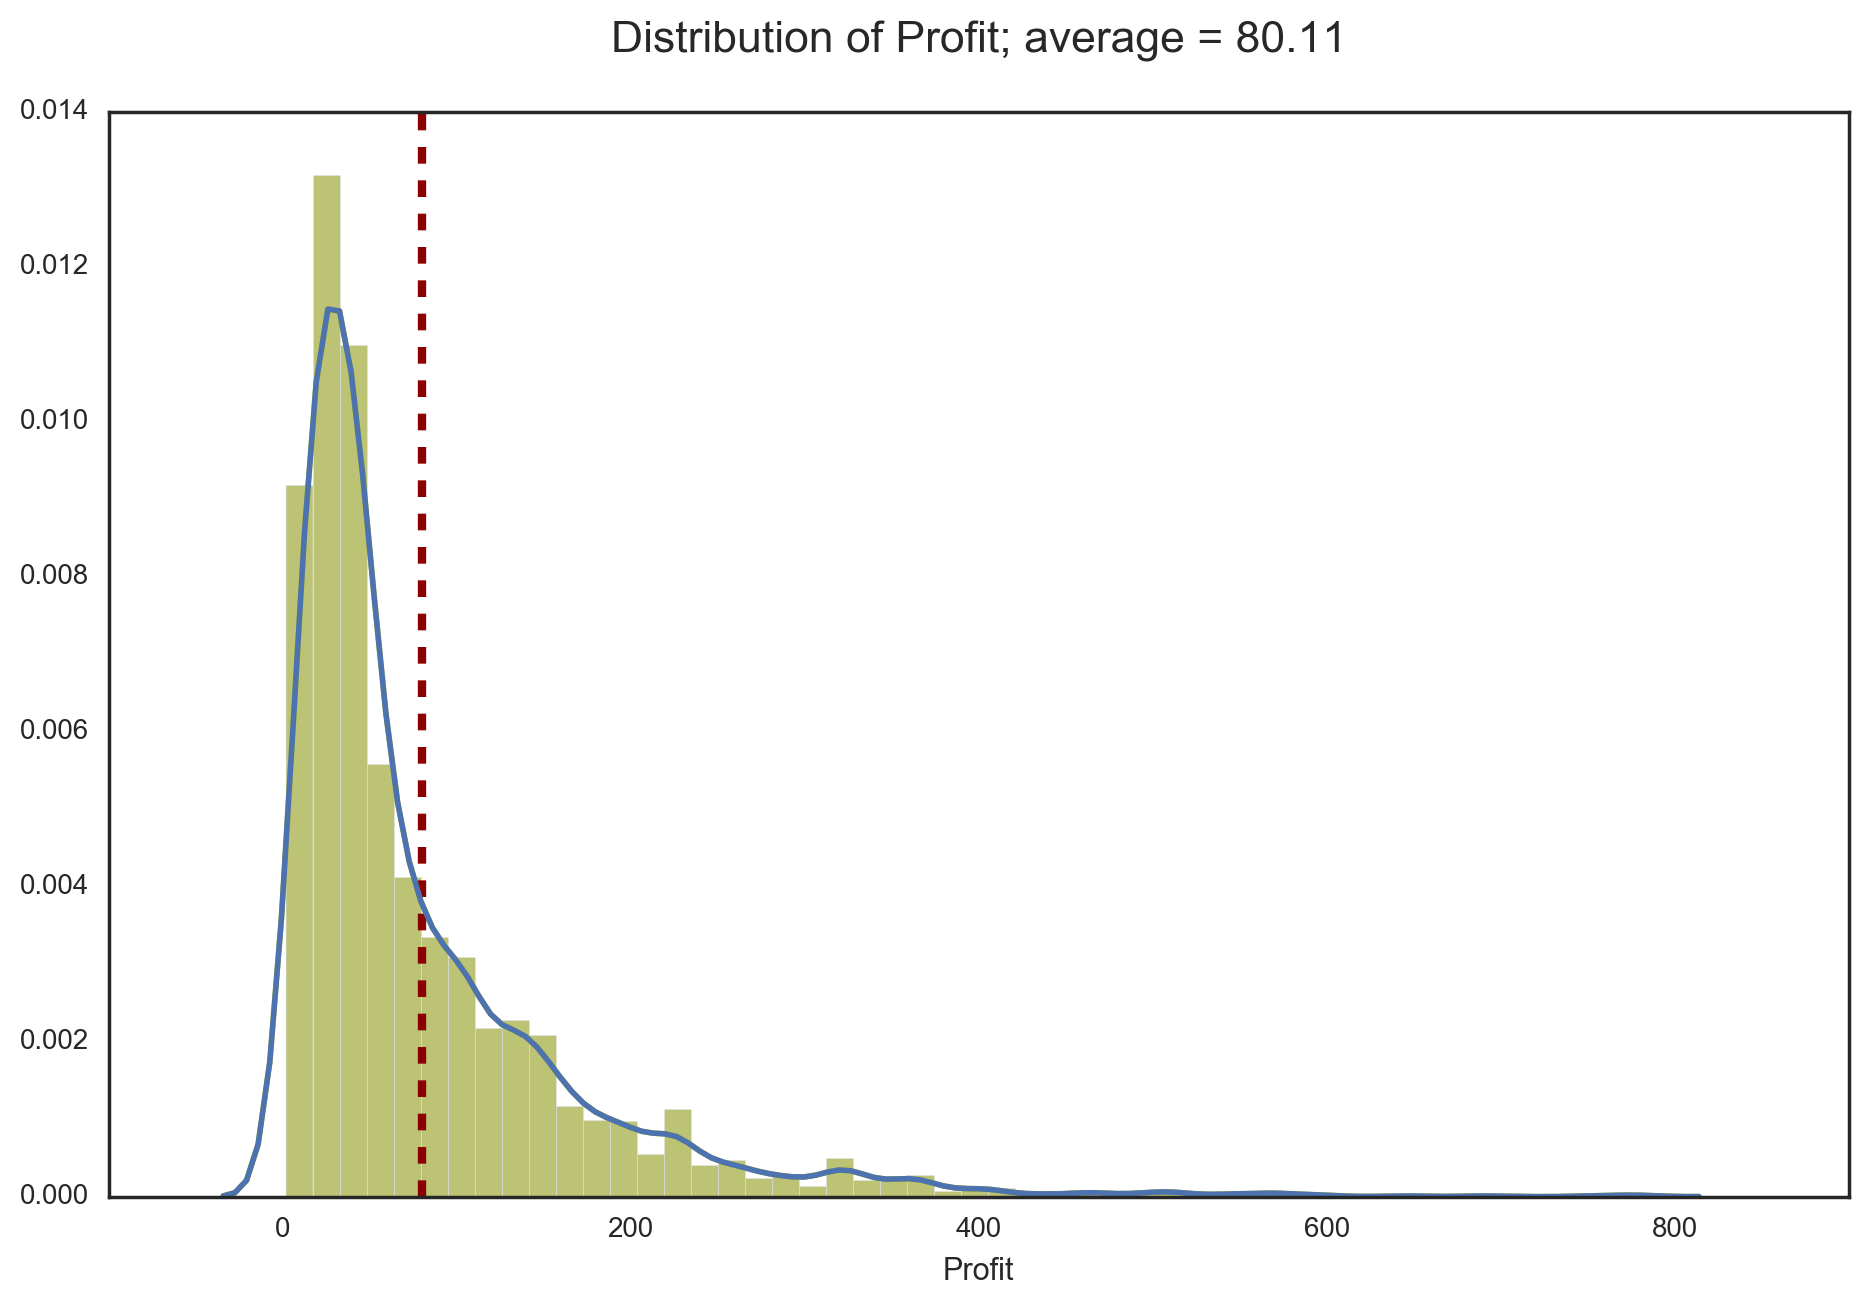

In [472]:
dist_plotter("Profit", coffee_chain.Profit, 'y')

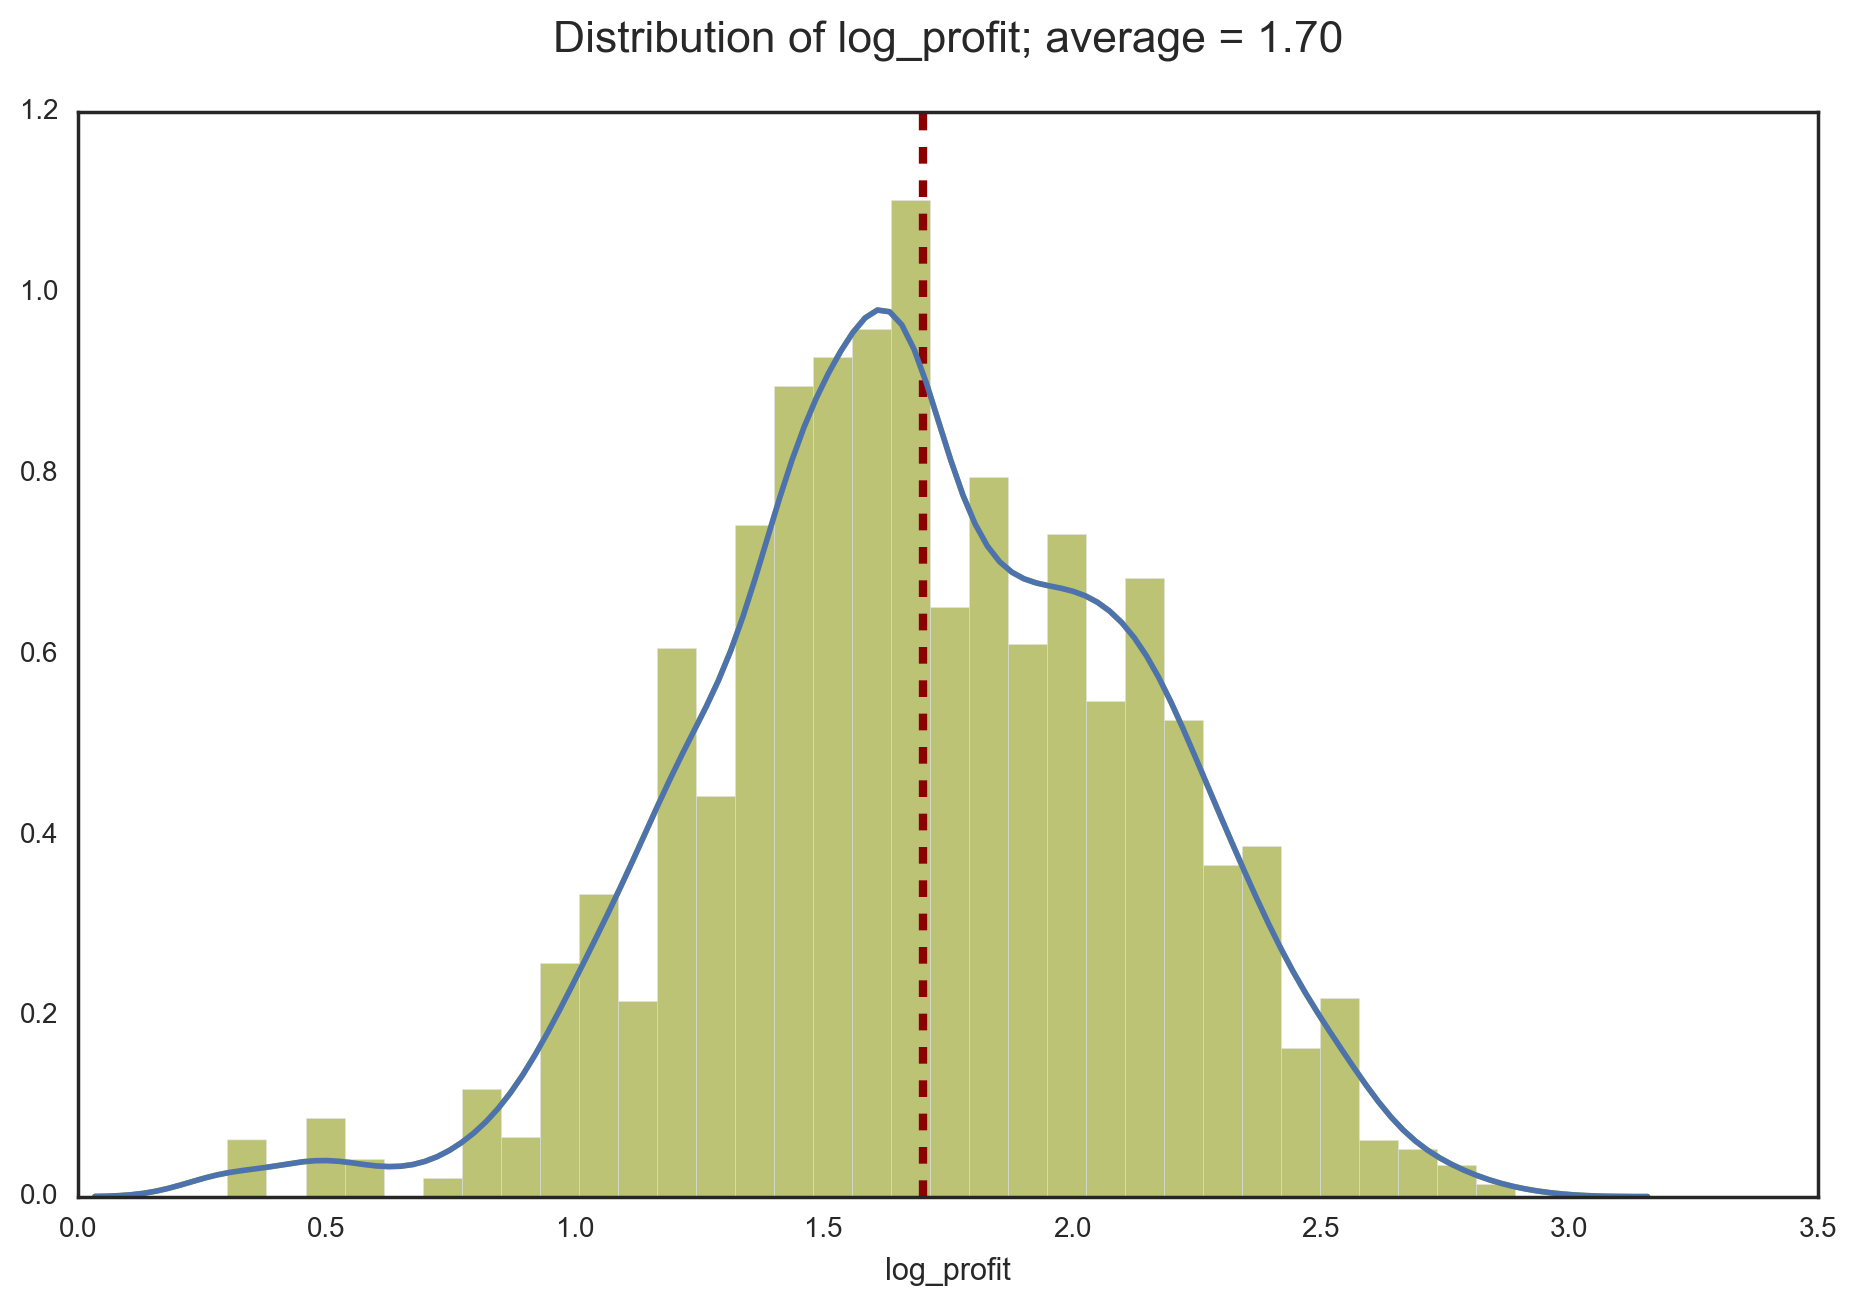

In [934]:
dist_plotter("log_profit", coffee_chain.log_profit, 'y')

In [935]:
## Define Y
Y=coffee_chain['log_profit']
## Define X
X=coffee_chain[['Budget_Profit','Budget_COGS','Budget_Margin','Budget_Sales','Inventory']]

In [936]:
##normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [937]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2555, 5) (1096, 5)


(2555,) (1096,)


In [938]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [939]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [940]:
### Print best estimator, best parameters, and best score

In [941]:
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1}


best score 0.85759325298


In [942]:
### Print Feature importances

In [943]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [944]:
feature_importance(X, dtr_best)

,feature,importance
0,Budget_Profit,0.865369
4,Inventory,0.054571
2,Budget_Margin,0.040226
3,Budget_Sales,0.029696
1,Budget_COGS,0.010139


In [945]:
### Predict 

In [946]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 1.98231626,  1.4691587 ,  1.51653345, ...,  2.10227999,
        1.2534395 ,  0.30103   ])

In [947]:
### Evaluate the performance of your model 
#### MSE in train and test data, R2 in train and test data

In [948]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [949]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [950]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.01, test data: 0.02
R^2 Regression tree train data: 0.93, test data: 0.88


MSE in train data is equal to 0.01,in test data is 0.02; and R^2 in train data is 0.94,in test data is 0.88.


---
Visualize tree USING the "best" parameteres/estimators
---

In [957]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [958]:
dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 0: ordinal not in range(128)

---
Use Random Forest Regression Tree model 
---

In [506]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [955]:
### 1. fit Random Forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   43.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

---
Model Evaluation
---

In [960]:
### 2.Print best estimator, best parameters, and best score

In [961]:
 ''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 3}


best score 0.803205922954


In [510]:
### 3.Print Feature importances

In [962]:
feature_importance(X, rfr_best)

,feature,importance
0,Budget_Profit,0.807235
2,Budget_Margin,0.144522
3,Budget_Sales,0.047711
4,Inventory,0.000533
1,Budget_COGS,0.000000


In [512]:
### 4.Predict

In [963]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2.04894251,  1.47486441,  1.56053294, ...,  2.05011134,
        1.47436229,  0.93700639])

In [514]:
### 5.Evaluate the performance of your model

In [964]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.04, test data: 0.03
R^2 Random Forest Regression tree train data: 0.81, test data: 0.83


The regression tree performance data is:

MSE in train data is equal to 0.02,in test data is 0.05; and R^2 in train data is 0.93,in test data is 0.88.

Compare with Random Forest Regression tree model, regression tree has lower MSE and higher R^2. We can choose regression tree model to predict the Profit.

---
###1.Profitbility analysis: 

From the EDA part, I figure out the first three questions I mentioned above.
Question: 

1.What are the most poplar products in coffee chain?

2.What kinds of products are underperformed? 

3.Is there any gain loss in the States? If so, which state? And what kind of product?

    In tea category: Darjeeling in Utah; Earl Grey in Missouri; Green Tea in Missouri, Nevada, Utah gained loss. Especially, Green-Tea loss -10980 in Nevada.  At the same time, Green tea’s marketing values are relatively high. 
    
    In Herbal tea category: Chamomile in Missouri; Lemon in Colorado and New Hampshire; Mint in New York Profits are negative.
    
    In Espresso category: Caffe Latte in New Mexico and Louisiana; Caffe Mocha in Massachusetts, New Hampshire, New Mexico, and New York; Regular Espresso New Hampshire's profits are negative.

    In café category: Amaretto in California and Oregon; Columbian in Nevada; Decaf Irish Cream California and Ohio are underperformed. On the other side, Columbian in California and Massachusetts had high profits.

Suggest solutions:

 Firm’s primary objective is to maximize profits. By using this data, the underperforming products and profit generating products already be found. Company should adjust their strategy:
    1. On the one hand, for the underperforming product, the company should stop selling them .More specific, Green-Tea loss -10980 in Nevada, whereas Green tea’s marketing values are relatively high at the same time. Based on this situation, the company should collect more data about the consumer behavior of coffee products and do more research to find out the key of the problems.  If it is tasty problem, they can make some changes such as find new suppliers, ECT.

    2.On the other hand, the company should focus on the products which are making money  and make the company better off.


---



---
From Machine Learning Part,I am trying to figure out the two questions:

1. Can we use data to predict whether product make money or no (gain loss or not).

2. Can we use budget datas to predict Profit and find a way to achieve profit maximization.

First of all , I ran Logistic Regression model,the Decison Tree and Random Forest Model. we can see the features that would affect on Profit loss or gain are: Budget_Profit,Margin,Marketing,Total_Expenses and COGS. ALL of them have positive effect on the Profit loss or gain prediction. Since the company should stop selling products which will gain loss, the three important features can help them to adjust the company's stretegy and make a precise decison.

secondly, I bulit regression tree and Random Forest Regression Tree model. The regression tree model can explain the model more accuracy due to it has a lower MSE and higher R^2 than Random Forest Regression Tree. The significant features are Budegt Profit, Inventory and Budget Margin. All of them have positve effect on Profit Maximization.


Conclusion:

1.From this coffee company, they should try to solve the probelsms found in the data. To obtain more profit, they should pay attention to their underperforming products, which are pointed out above, and devote into budget profit,budegt Margin and inventory value improvement. And find out the way to raise the budget profit,budegt Margin and inventory.

2.For project two, the data is limited because it only contain one year data and lack of consumer behavior data.
If the data is 5 year time series data, we probably can use it to predict the sales or profit of differnt quarter of a year,also we can make more specific business strategy can after we do more analysis on consumer behavior. Because most of the real coffee business data is not free, so there is a data collecting problem of my research.



---